In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Откройте изображение Morph.jpg. Примените к нему базовые
морфологические операции (дилатацию и эрозию) с структурными
элементами крест, прямоугольник и эллипс (для каждого из них попробуйте
размеры 3x3 и 5х5) и с 1, 3 , 5 итерациями. Сохраните результаты, дайте
пояснения к ним

In [2]:
def img_show(imgs, title='', ax=None):
    ax.imshow(imgs , cmap='gray')
    ax.set_title(title)

In [3]:
def transform_show(imgs,titles_hist):
    fig, axs = plt.subplots(1, 3, figsize=(30, 10))
    img_show( imgs[0],'Исходное',axs[0])
    img_show( imgs[1],titles_hist[0],axs[1])
    img_show( imgs[2],titles_hist[1],axs[2])

In [4]:
img1 = cv2.imread('lab5/Morph.jpg')
img2 = cv2.imread('lab5/morph3.bmp')
img3 = cv2.imread('lab5/morph2.bmp')
img4 = cv2.imread('lab5/Fingerprint.jpg')


In [5]:
def set_kernel(type, size):
    if type == 'cross':  #структурный элемент ‘крест’
        if size == 3:
            return np.asmatrix([[0,1,0],[1,1,1],[0,1,0]], 'uint8') #размера 3
        else:
            return cv2.getStructuringElement(cv2.MORPH_CROSS, (size,size)) # структурный элемент ‘крест’ размера size
    elif type == 'ellipse':
        return  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size,size)) #структурный элемент ‘эллипс’ размера size
    elif type == 'rectangle':
        return cv2.getStructuringElement(cv2.MORPH_RECT, (size,size)) # структурный элемент ‘прямоугольник’ размера size

Крест используется для выделения линейных структур на изображении, таких как горизонтальные или вертикальные линии.

Эллипс используется для обработки изображений с объектами, имеющими круглую или овальную форму.

Прямоугольник широко используется в морфологической обработке для обработки областей с прямоугольной или квадратной формой.

In [6]:
def get_operations(img, type_operations,type_kernel):
    size_iterations = [1,3,5]
    for size_iteration in size_iterations:
        if type_operations == 'dilation':
            new_img1= cv2.dilate(img, set_kernel(type_kernel,3), iterations=size_iteration)# операция дилатаци
            new_img2 = cv2.dilate(img, set_kernel(type_kernel,5), iterations=size_iteration)# операция дилатаци
        elif type_operations == 'erosion':
            new_img1 = cv2.erode(img, set_kernel(type_kernel,3), iterations=size_iteration)# операция эрозии
            new_img2 = cv2.erode(img, set_kernel(type_kernel,5), iterations=size_iteration)# операция эрозии
        transform_show([img,new_img1,new_img2],[f'операция {type_operations}, структурный элемент {type_kernel}, размер 3x3, кол-во итераций {size_iteration}',
                                      f'операция {type_operations}, структурный элемент {type_kernel}, размер 5x5, кол-во итераций {size_iteration}'])



Эти операции обычно используются в контексте обработки изображений для улучшения качества, удаления шума, выделения объектов

Дилатация: Операция дилатации расширяет границы объектов на изображении.
Эрозия: Операция эрозии, наоборот, сужает границы объектов на изображении.

In [7]:
type_operations = ['dilation', 'erosion']
type_kernel = ['cross', 'ellipse', 'rectangle']

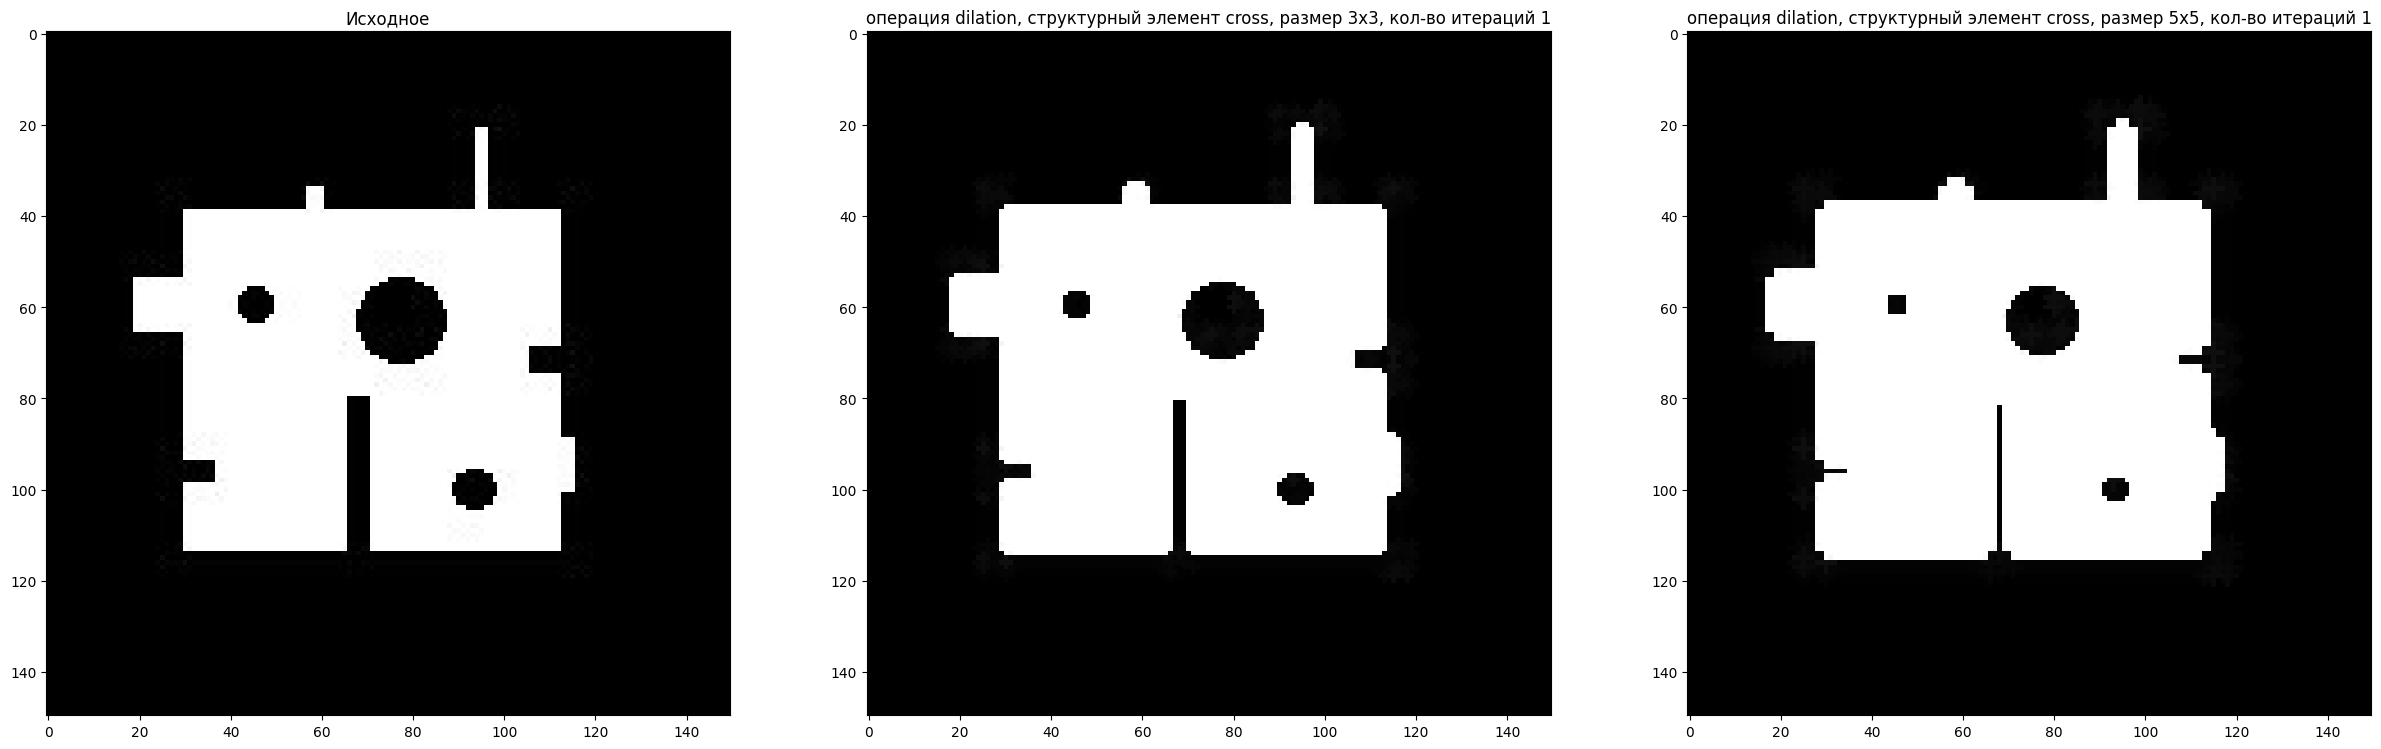

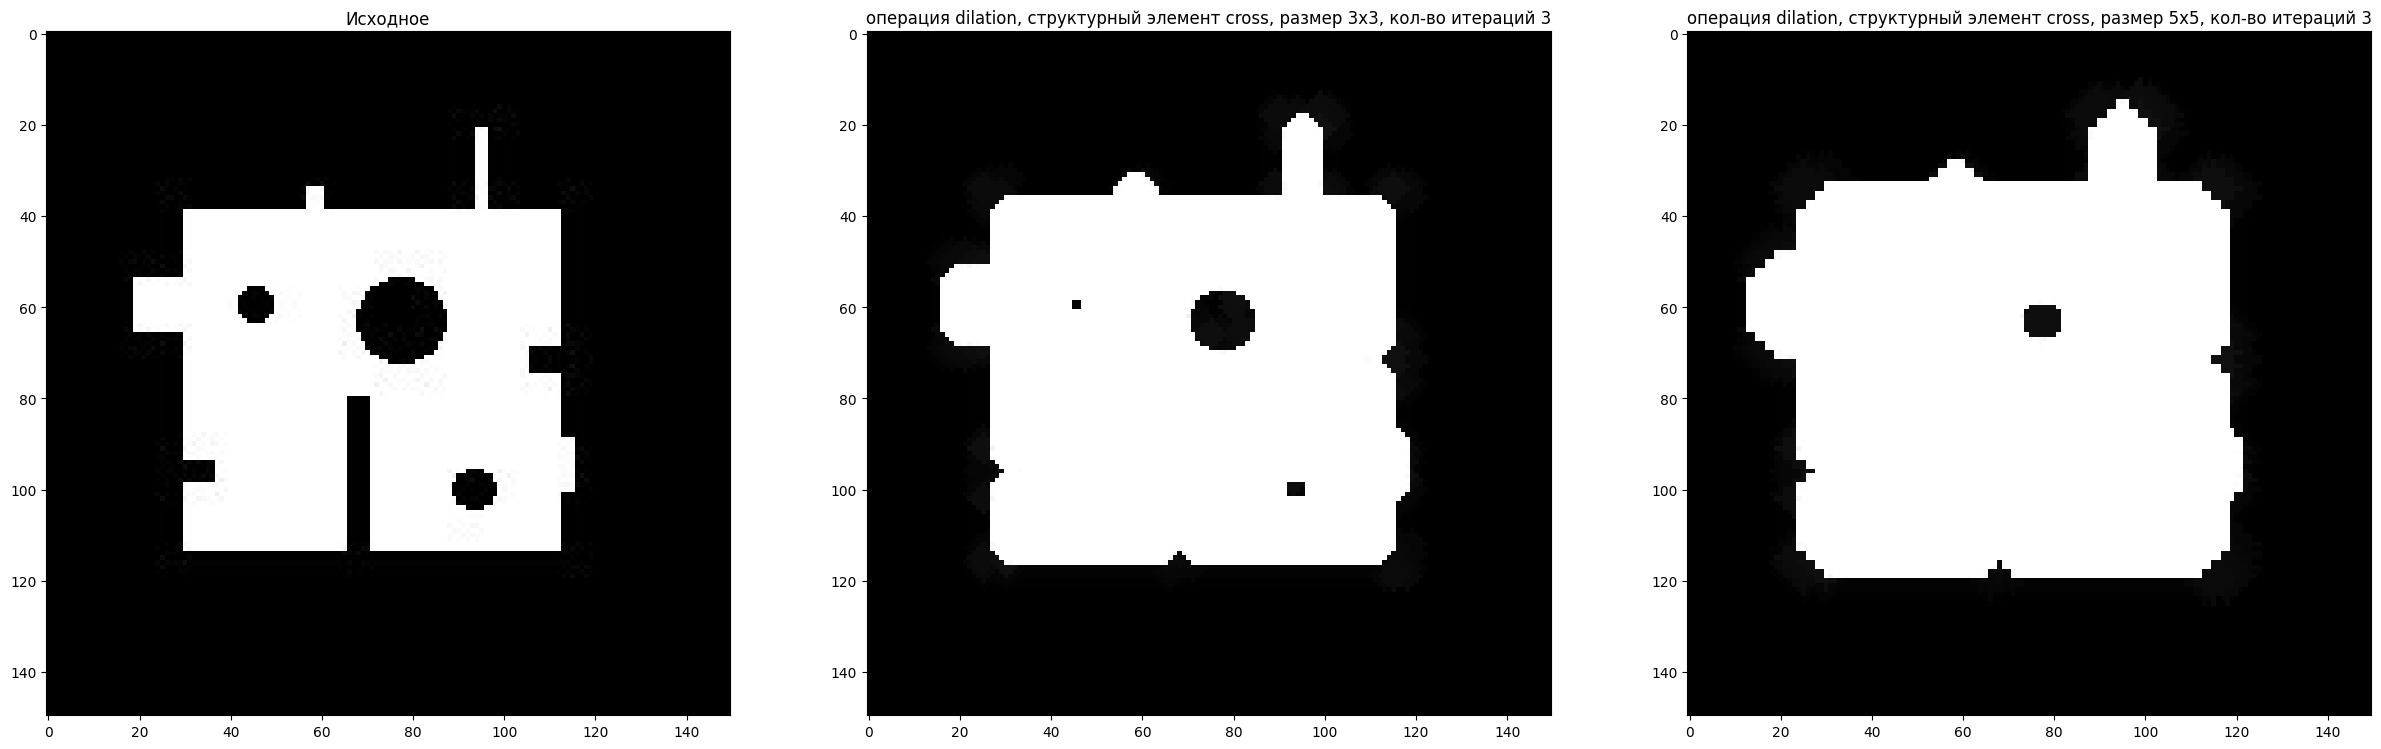

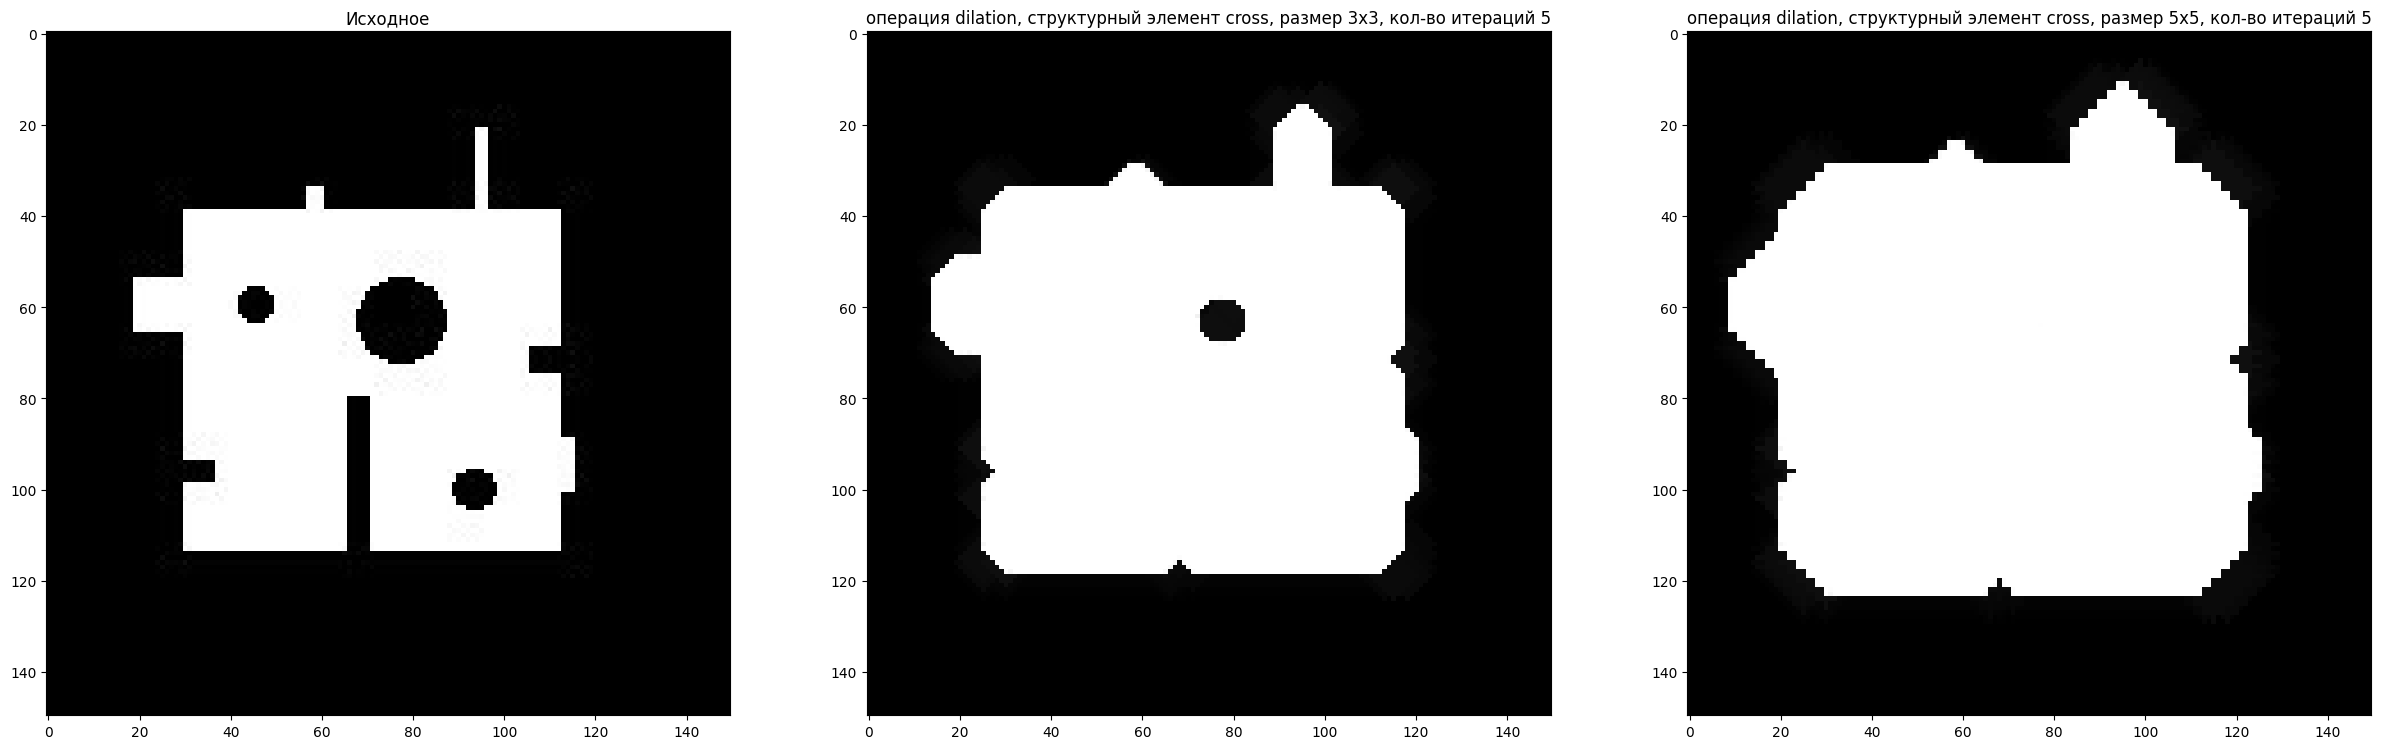

In [8]:
get_operations(img1, type_operations[0], type_kernel[0])

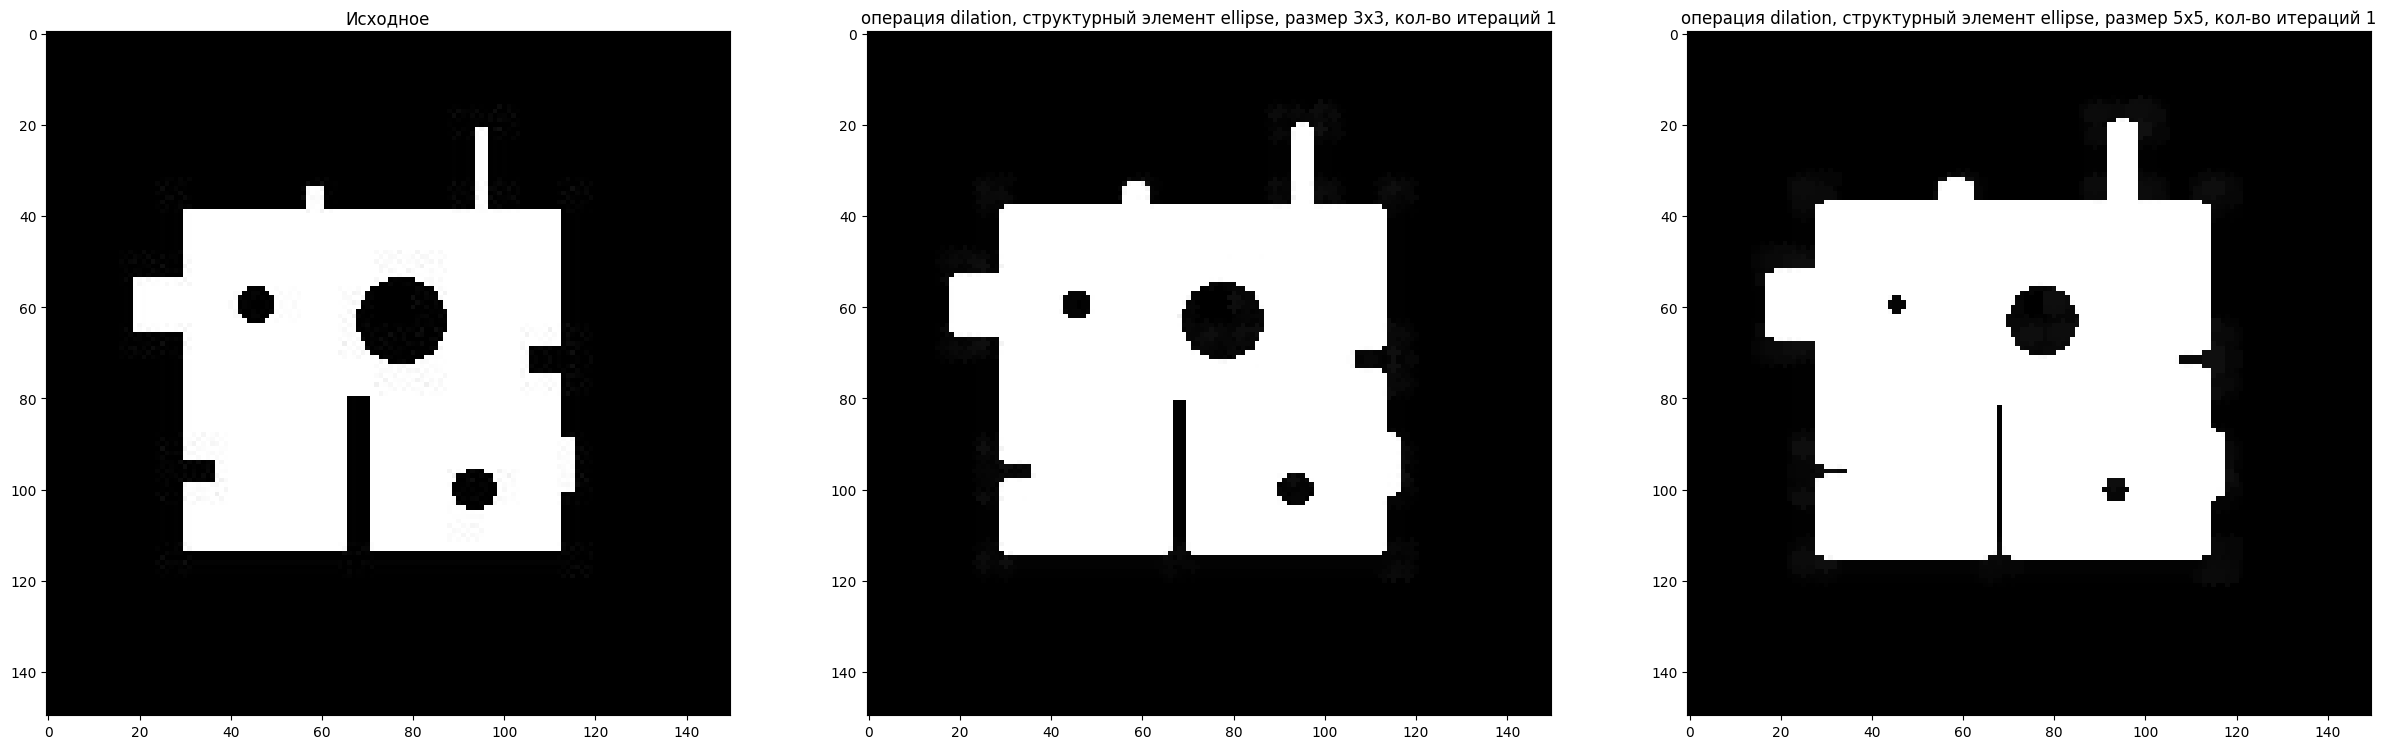

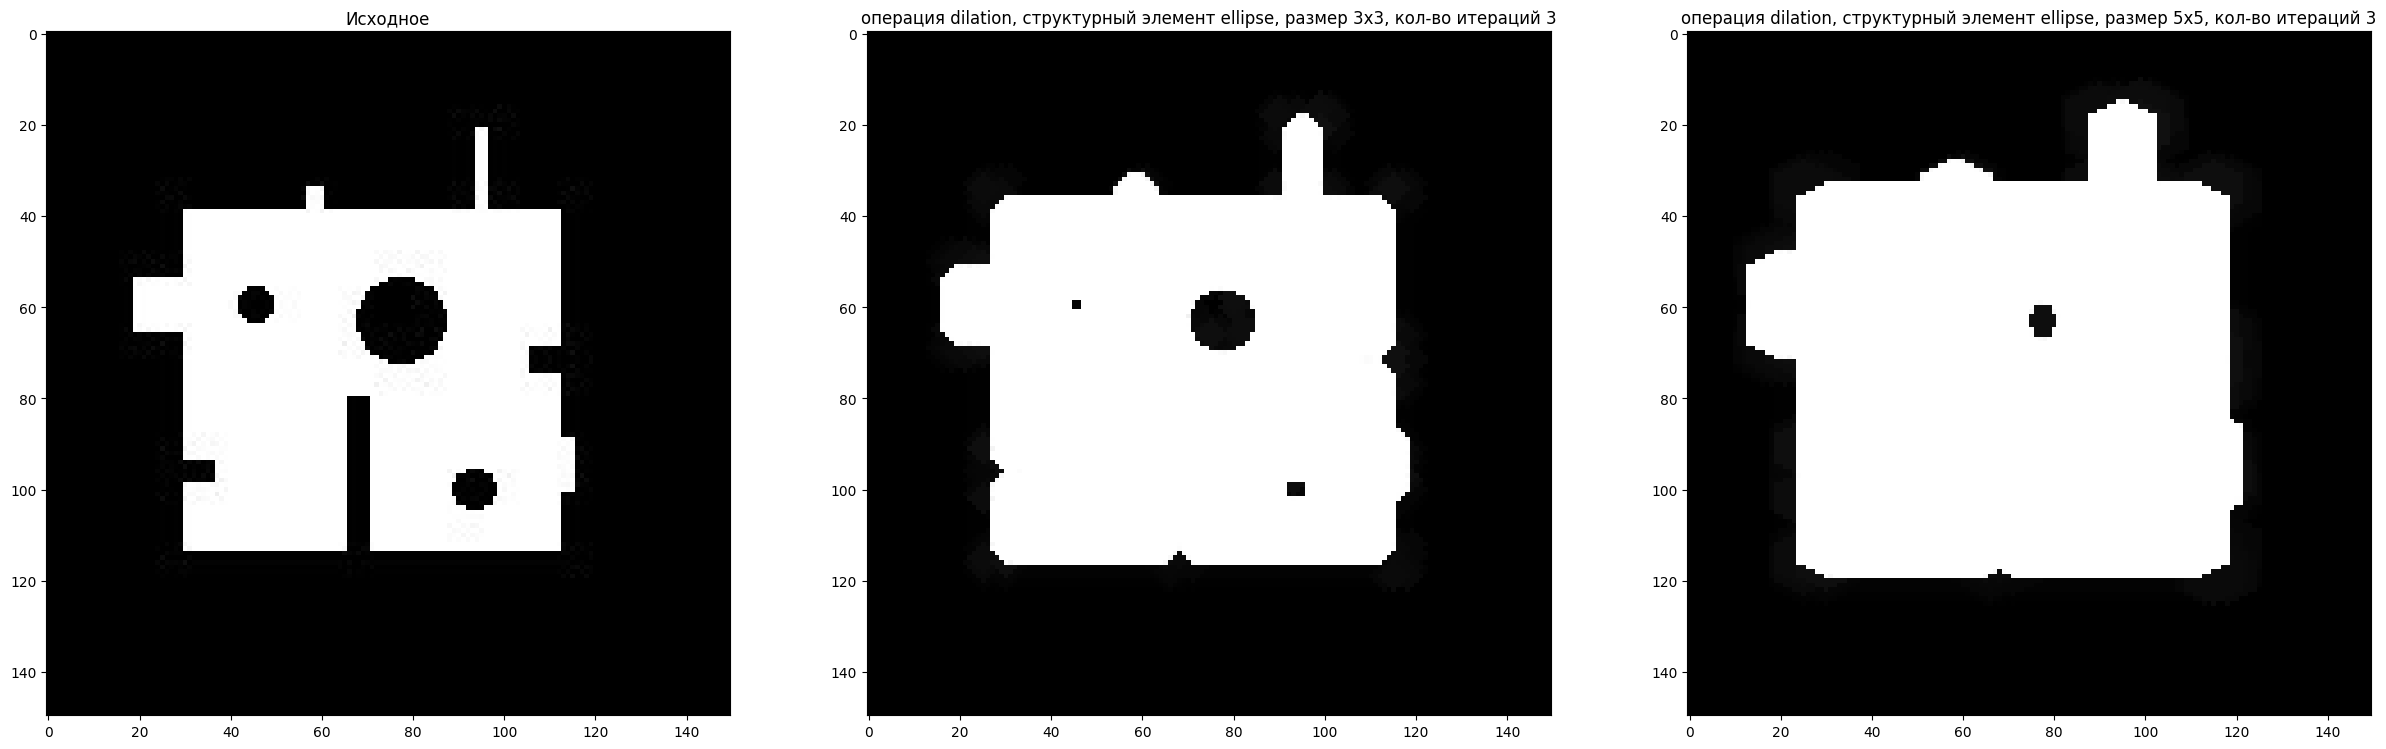

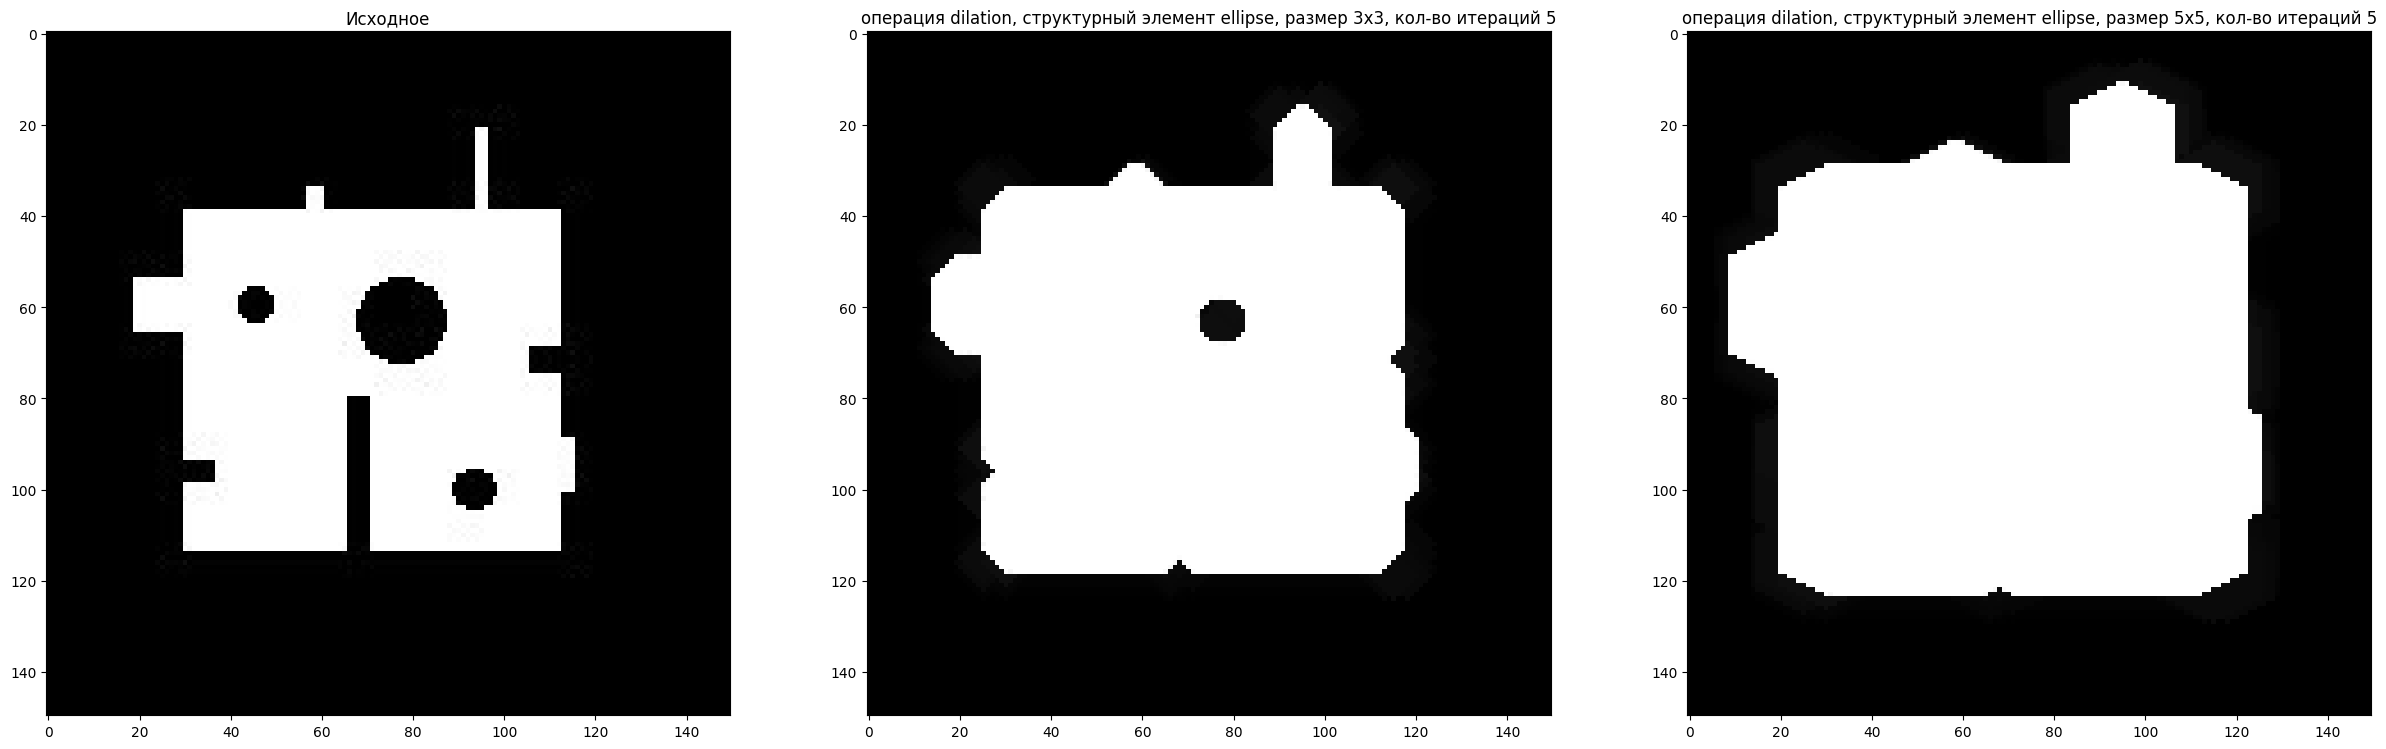

In [9]:
get_operations(img1, type_operations[0], type_kernel[1])

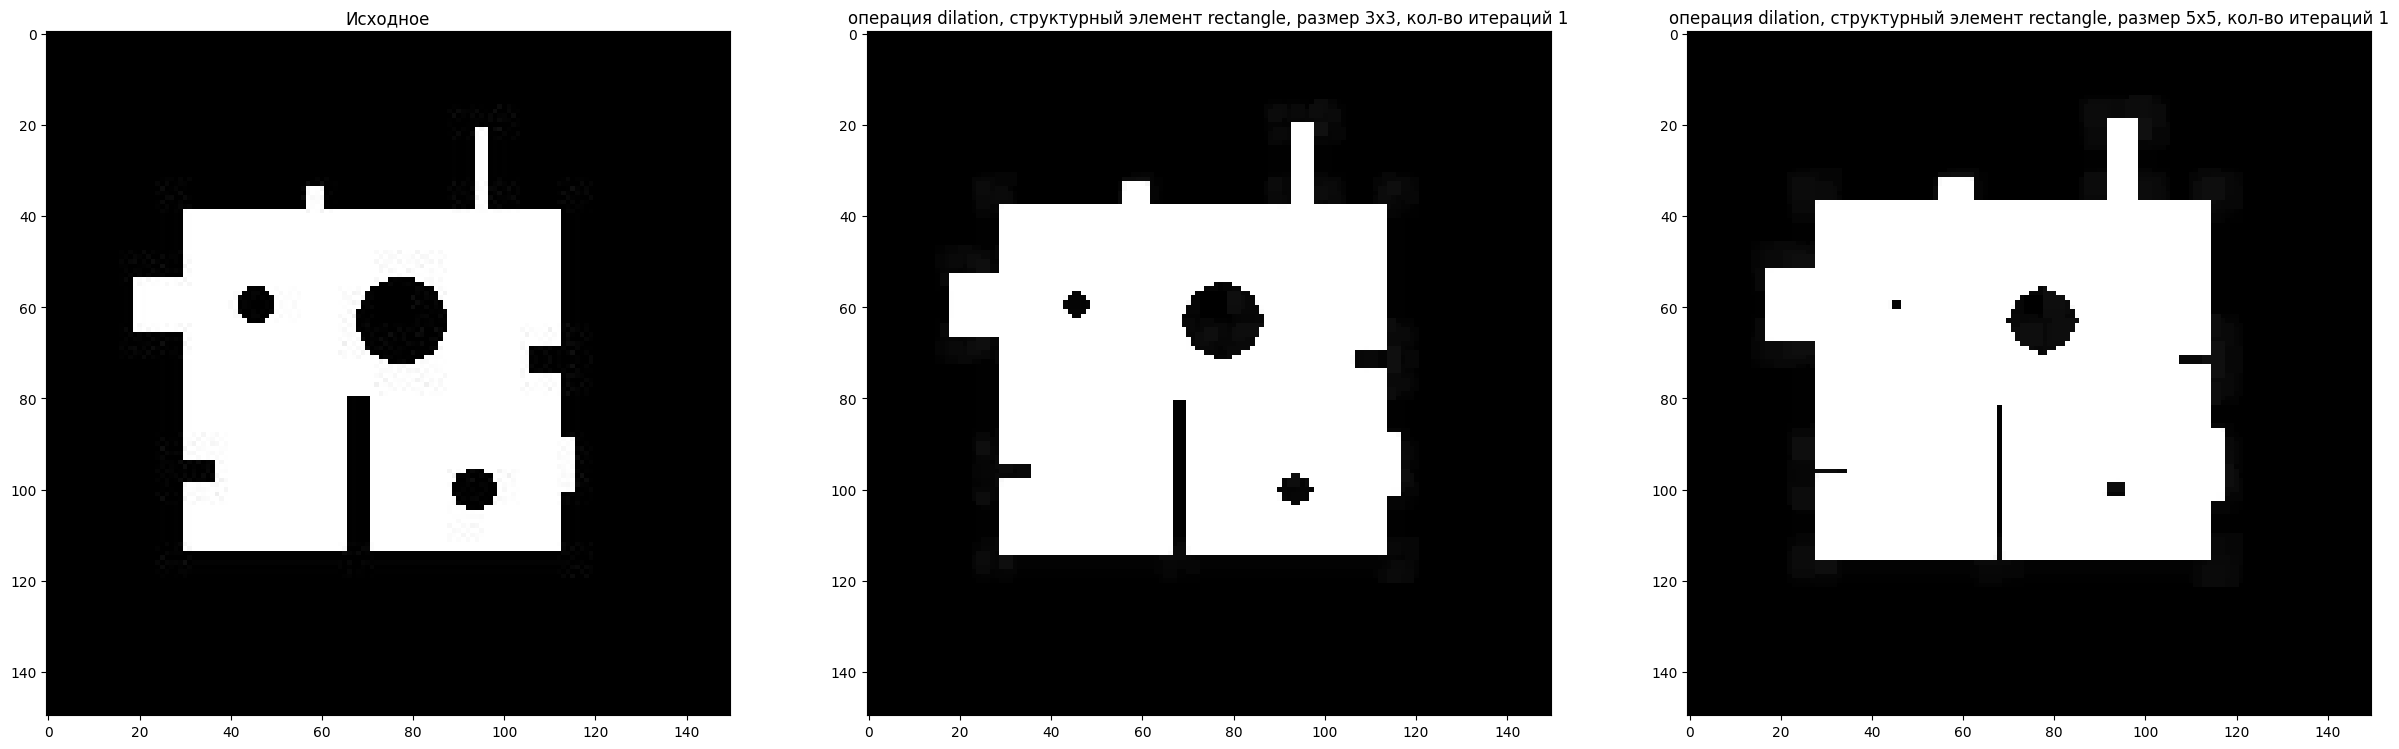

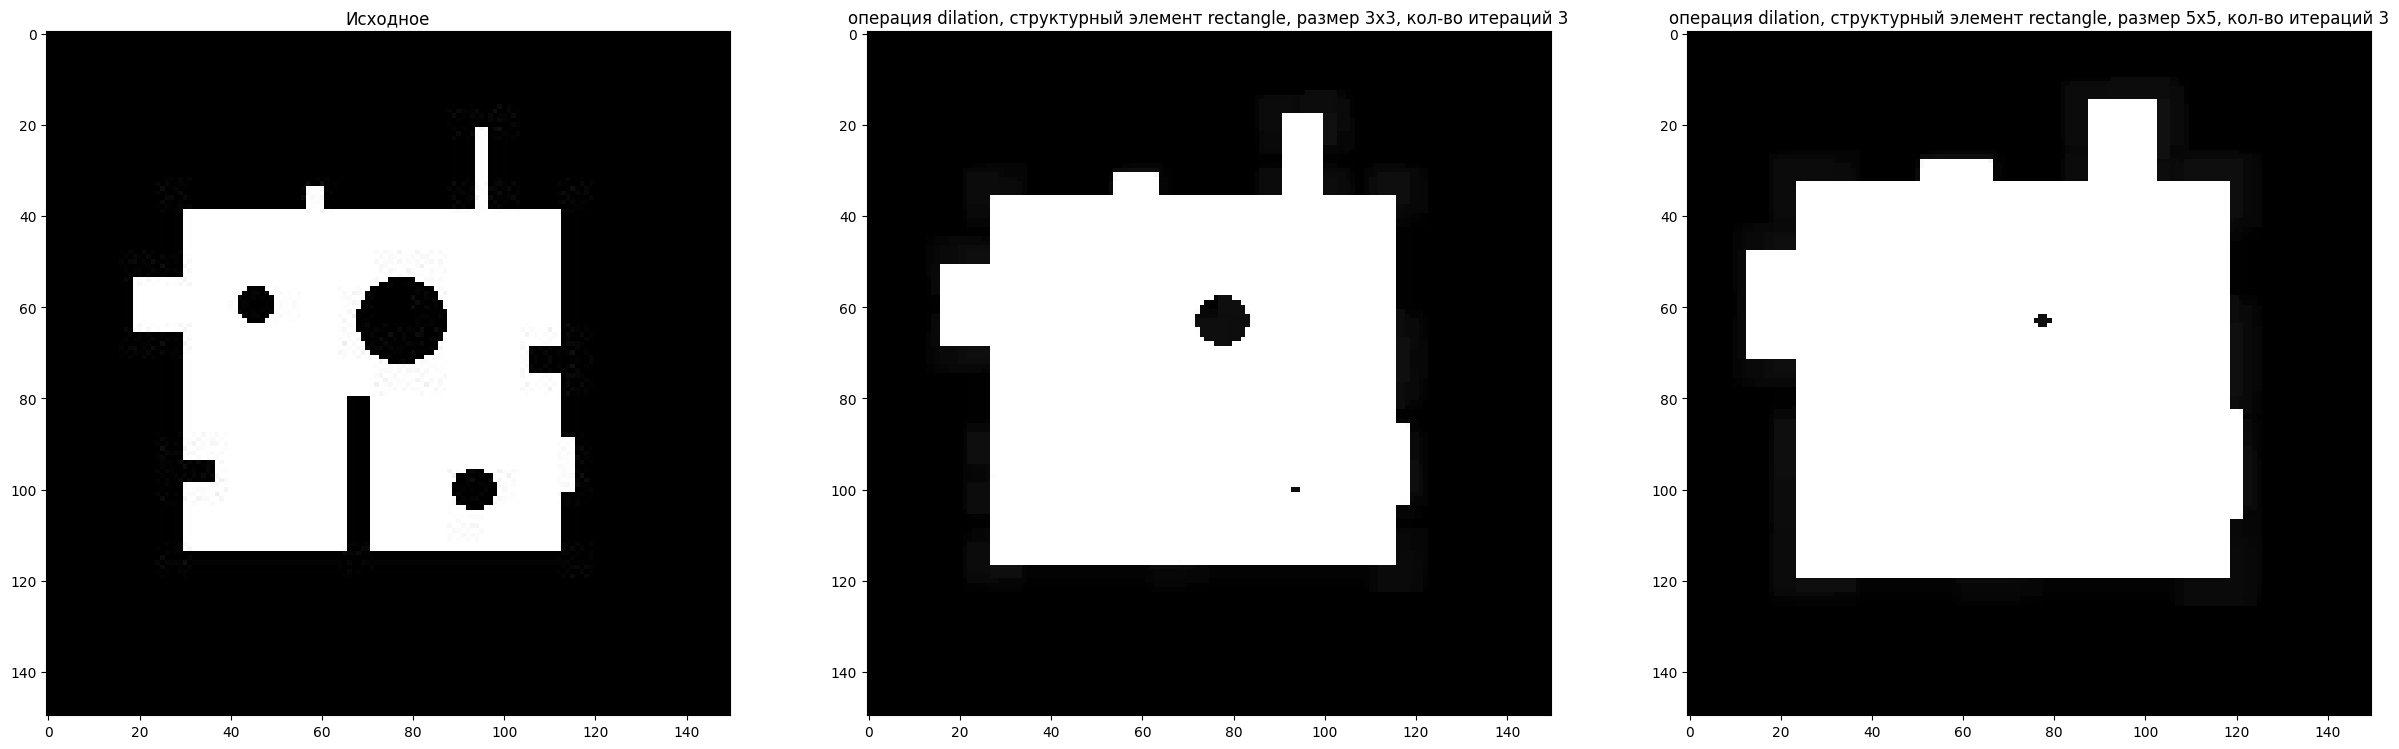

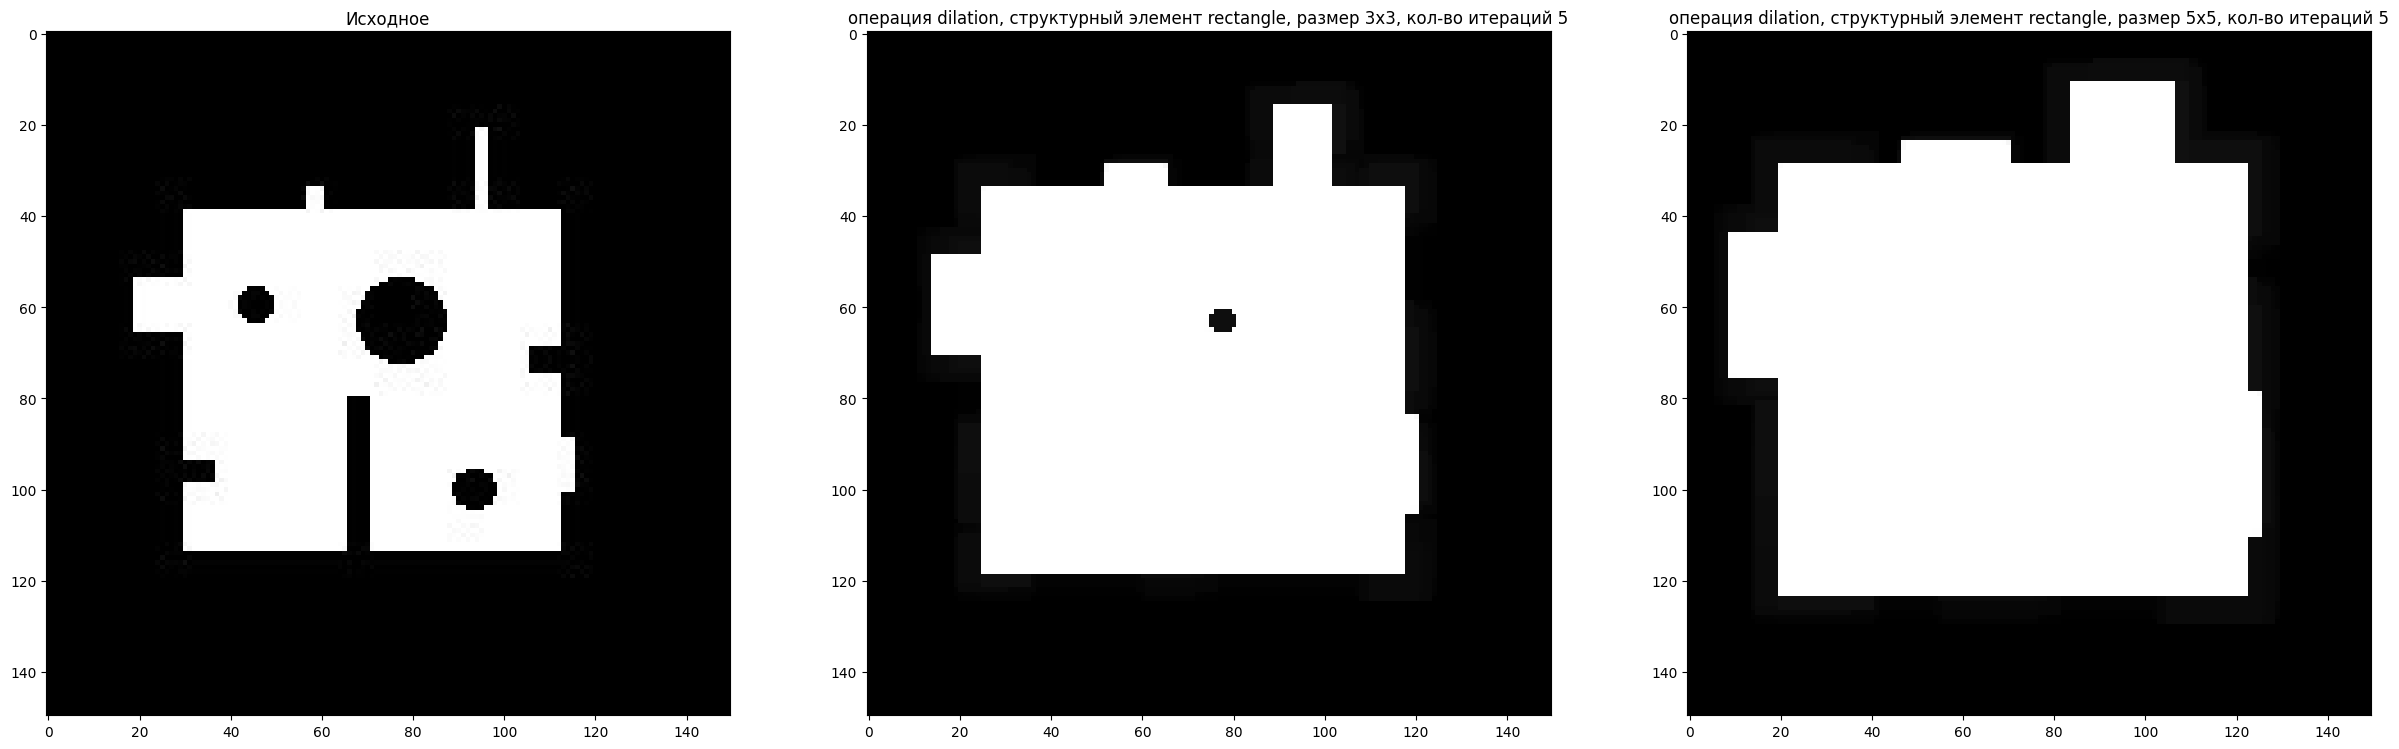

In [10]:
get_operations(img1, type_operations[0], type_kernel[2])

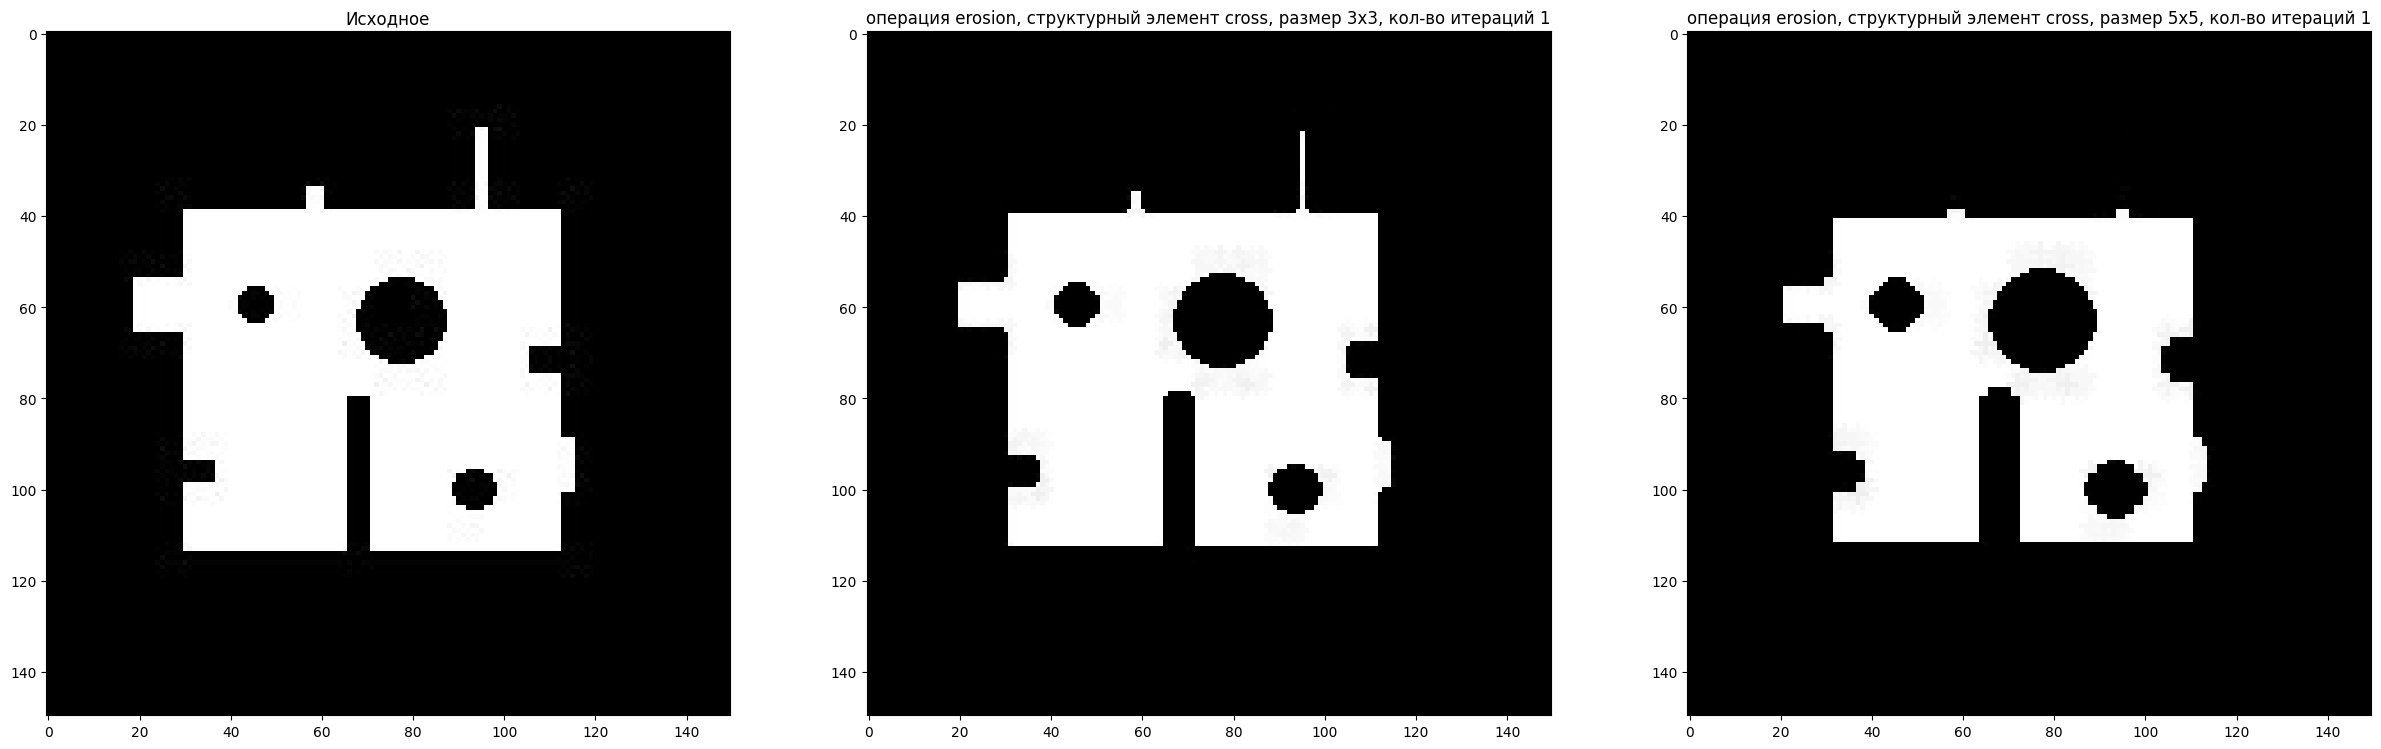

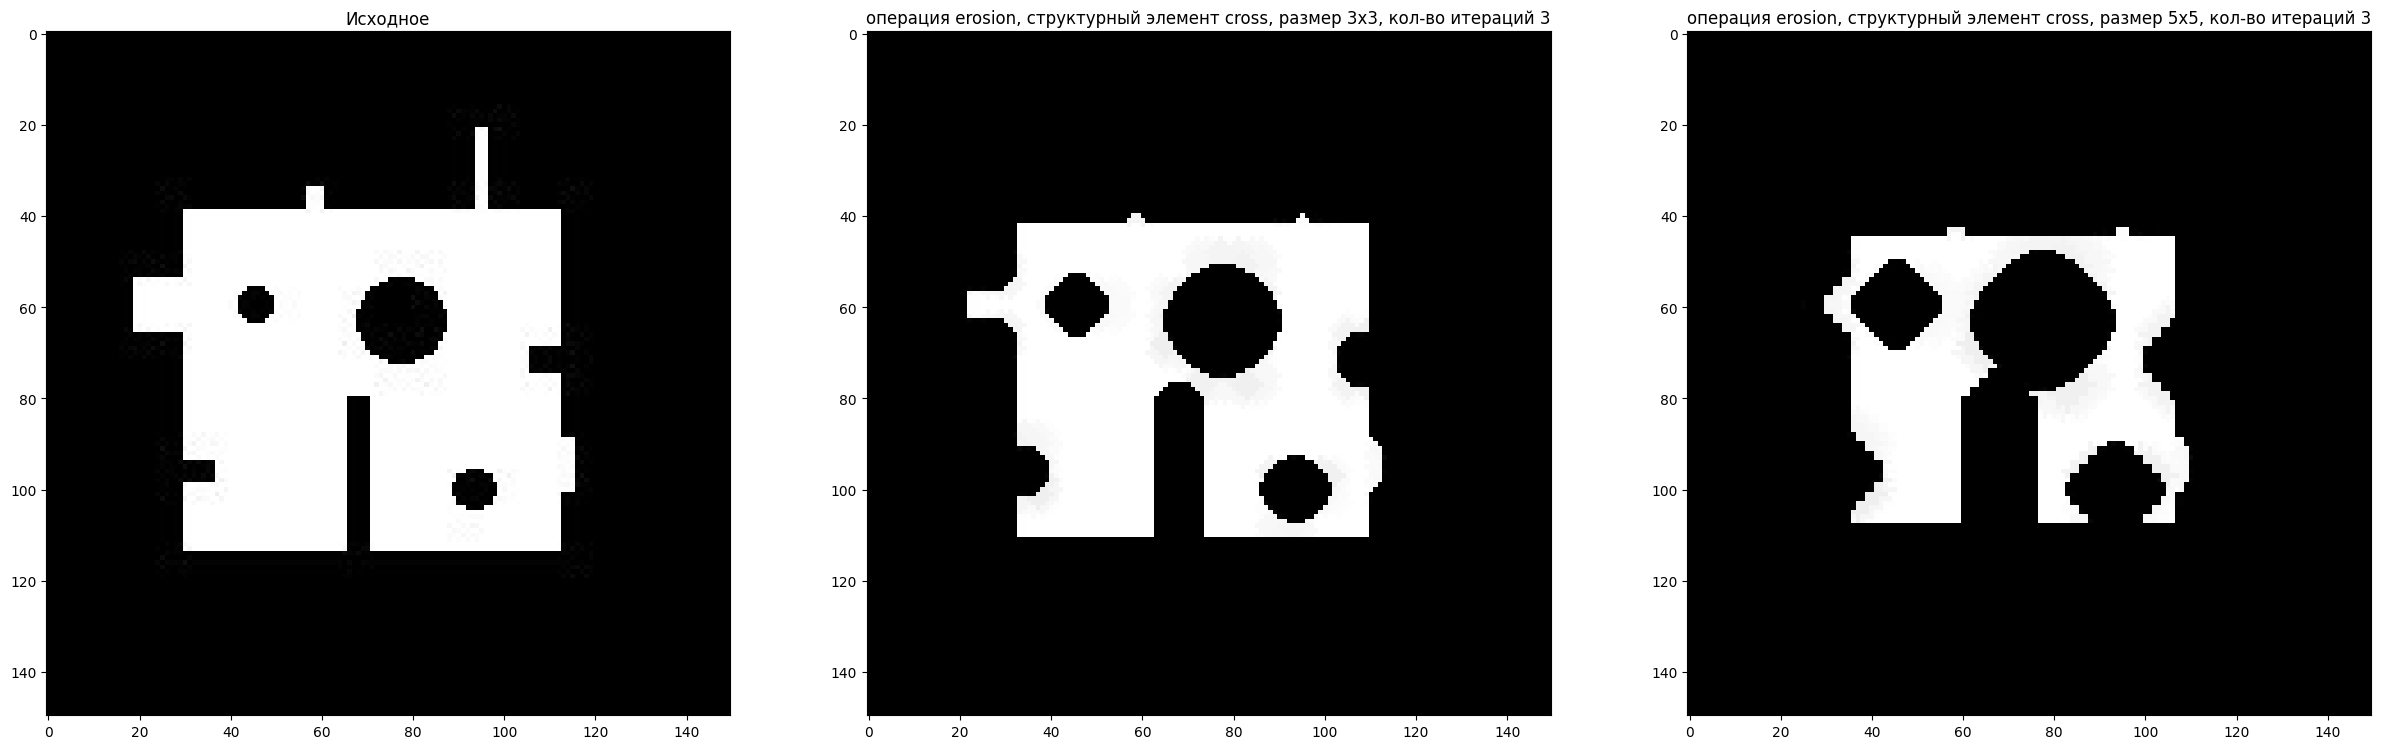

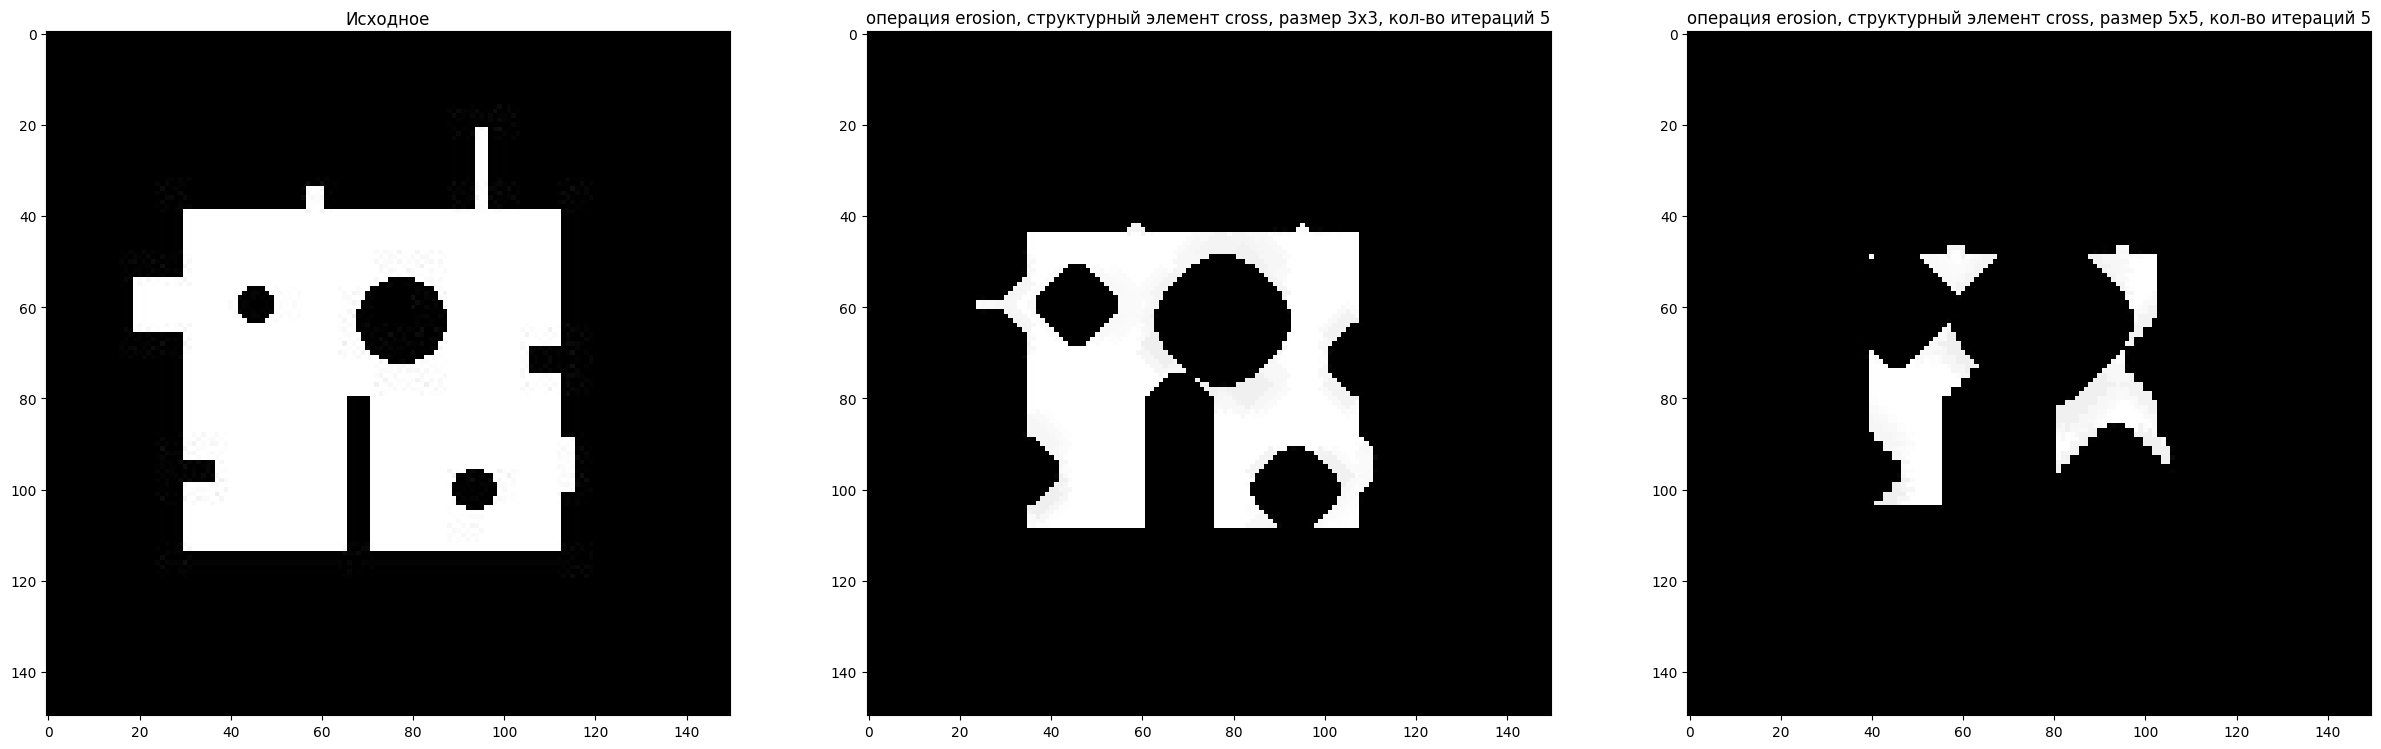

In [11]:
get_operations(img1, type_operations[1], type_kernel[0])

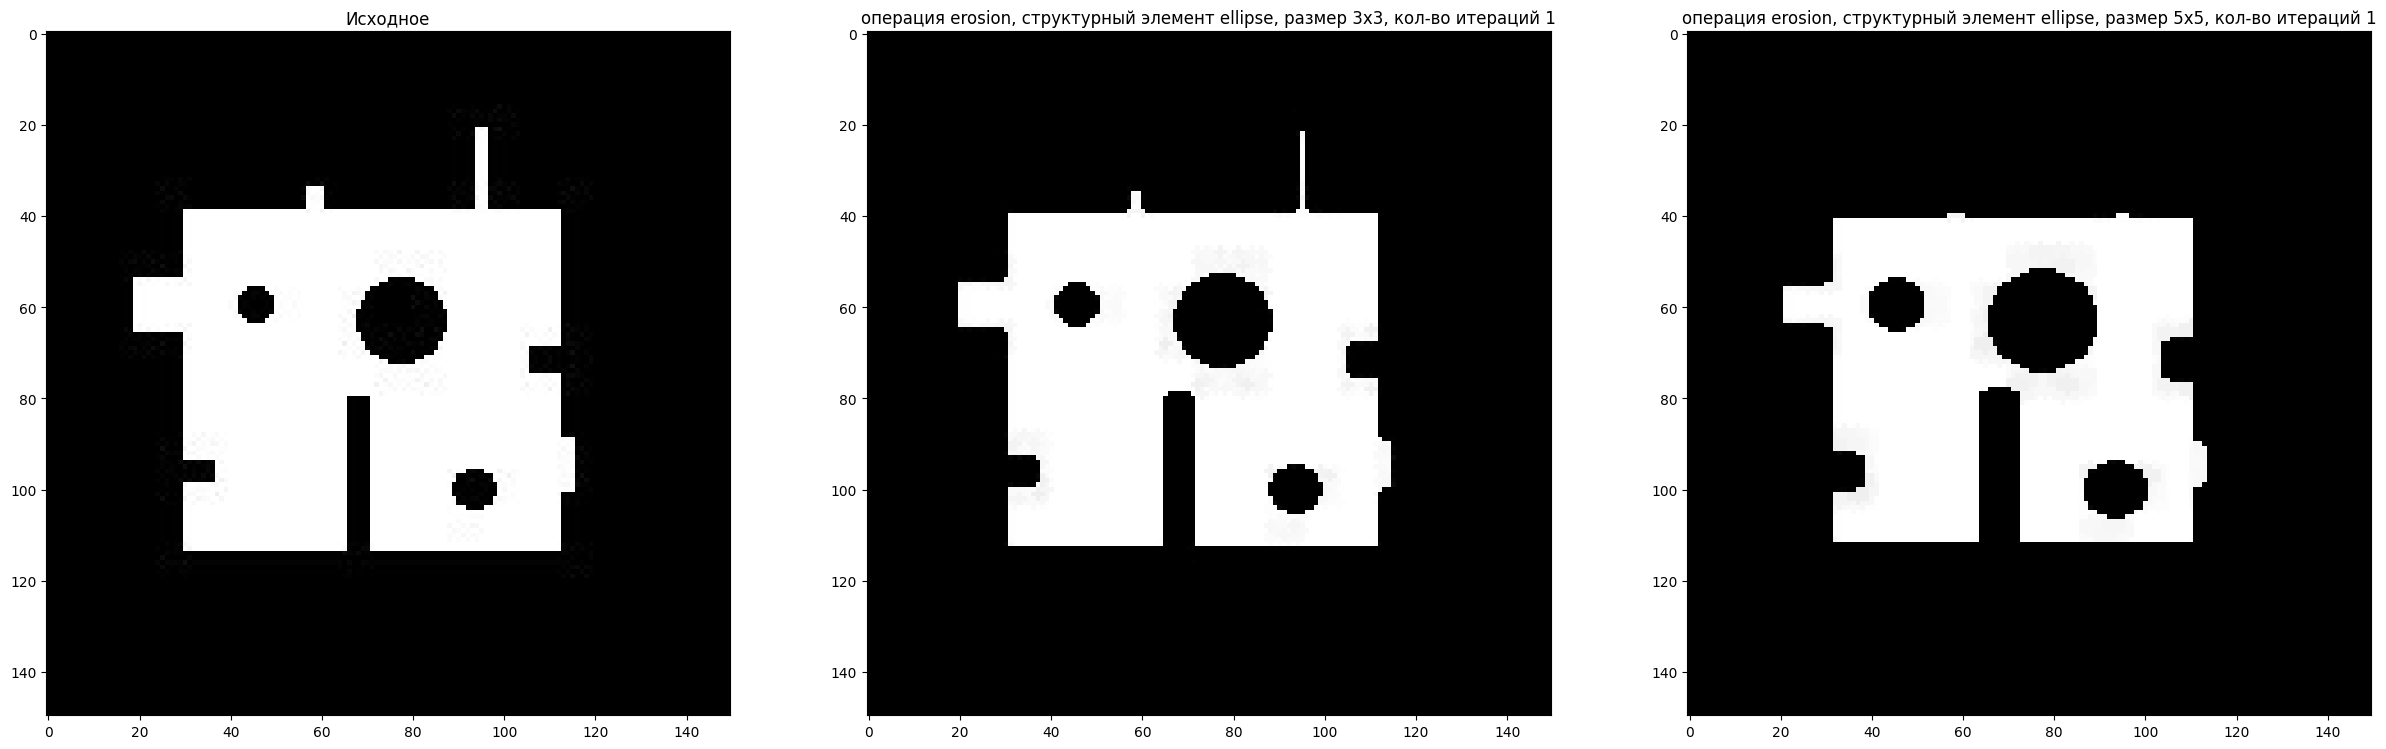

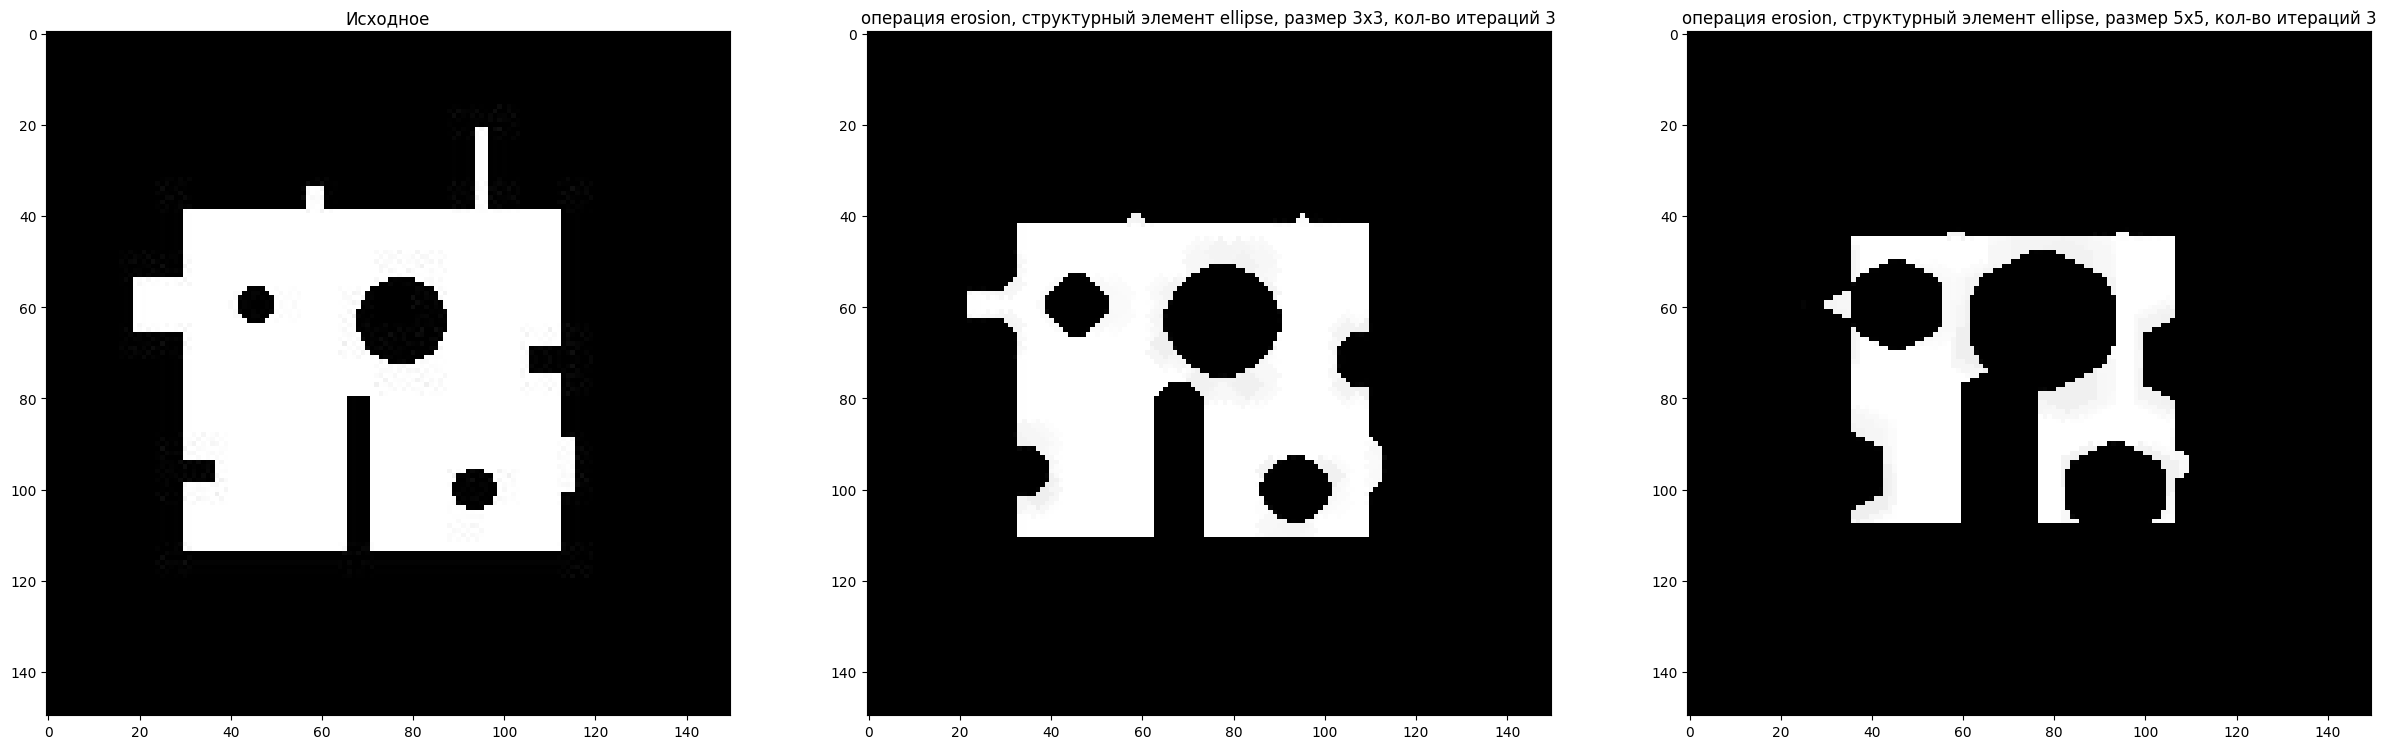

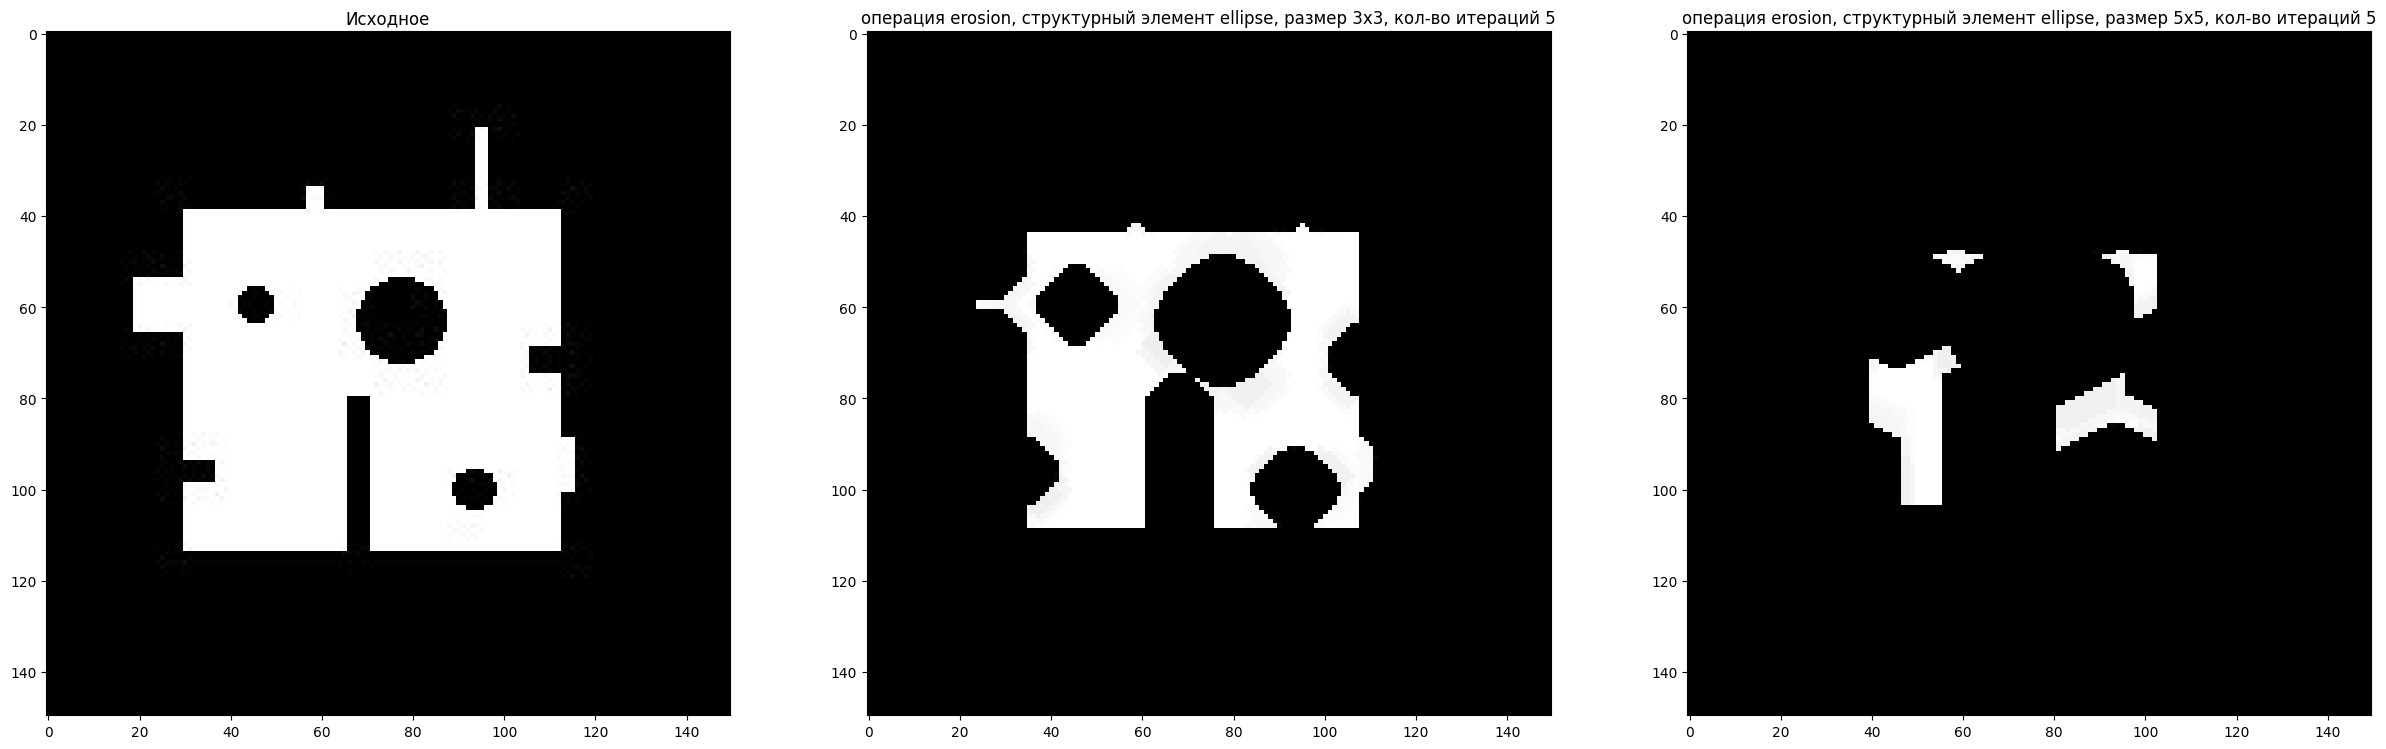

In [12]:
get_operations(img1, type_operations[1], type_kernel[1])

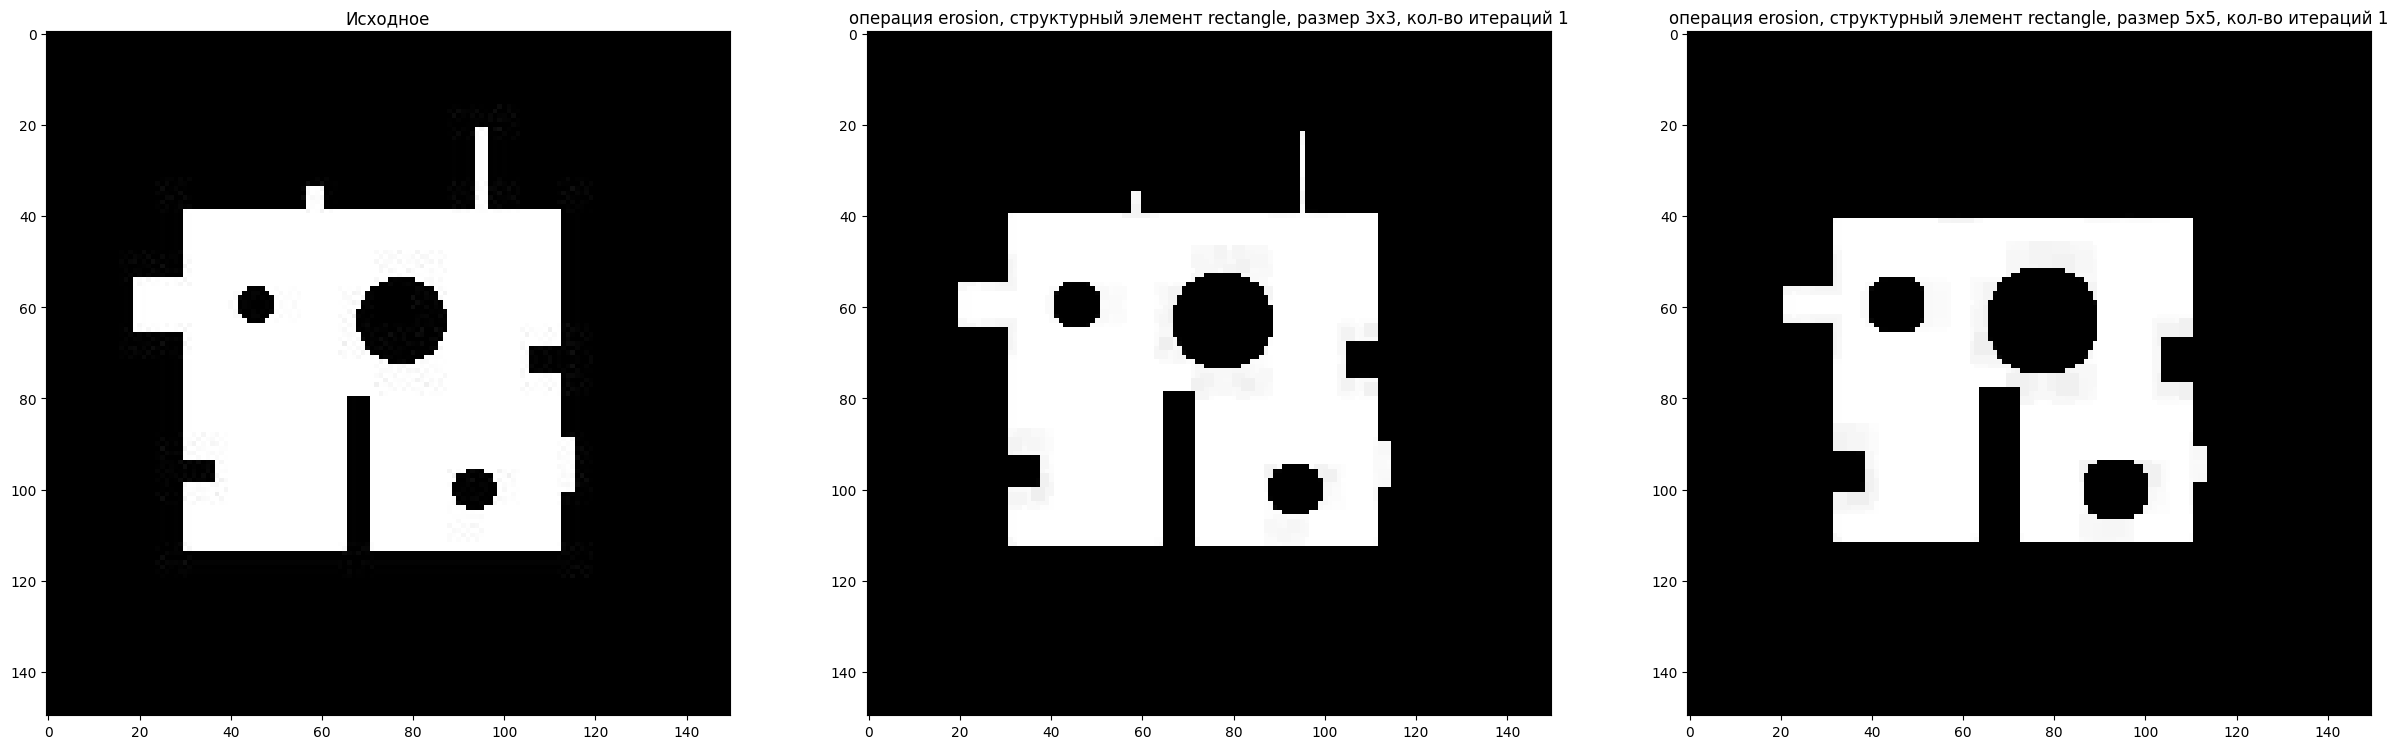

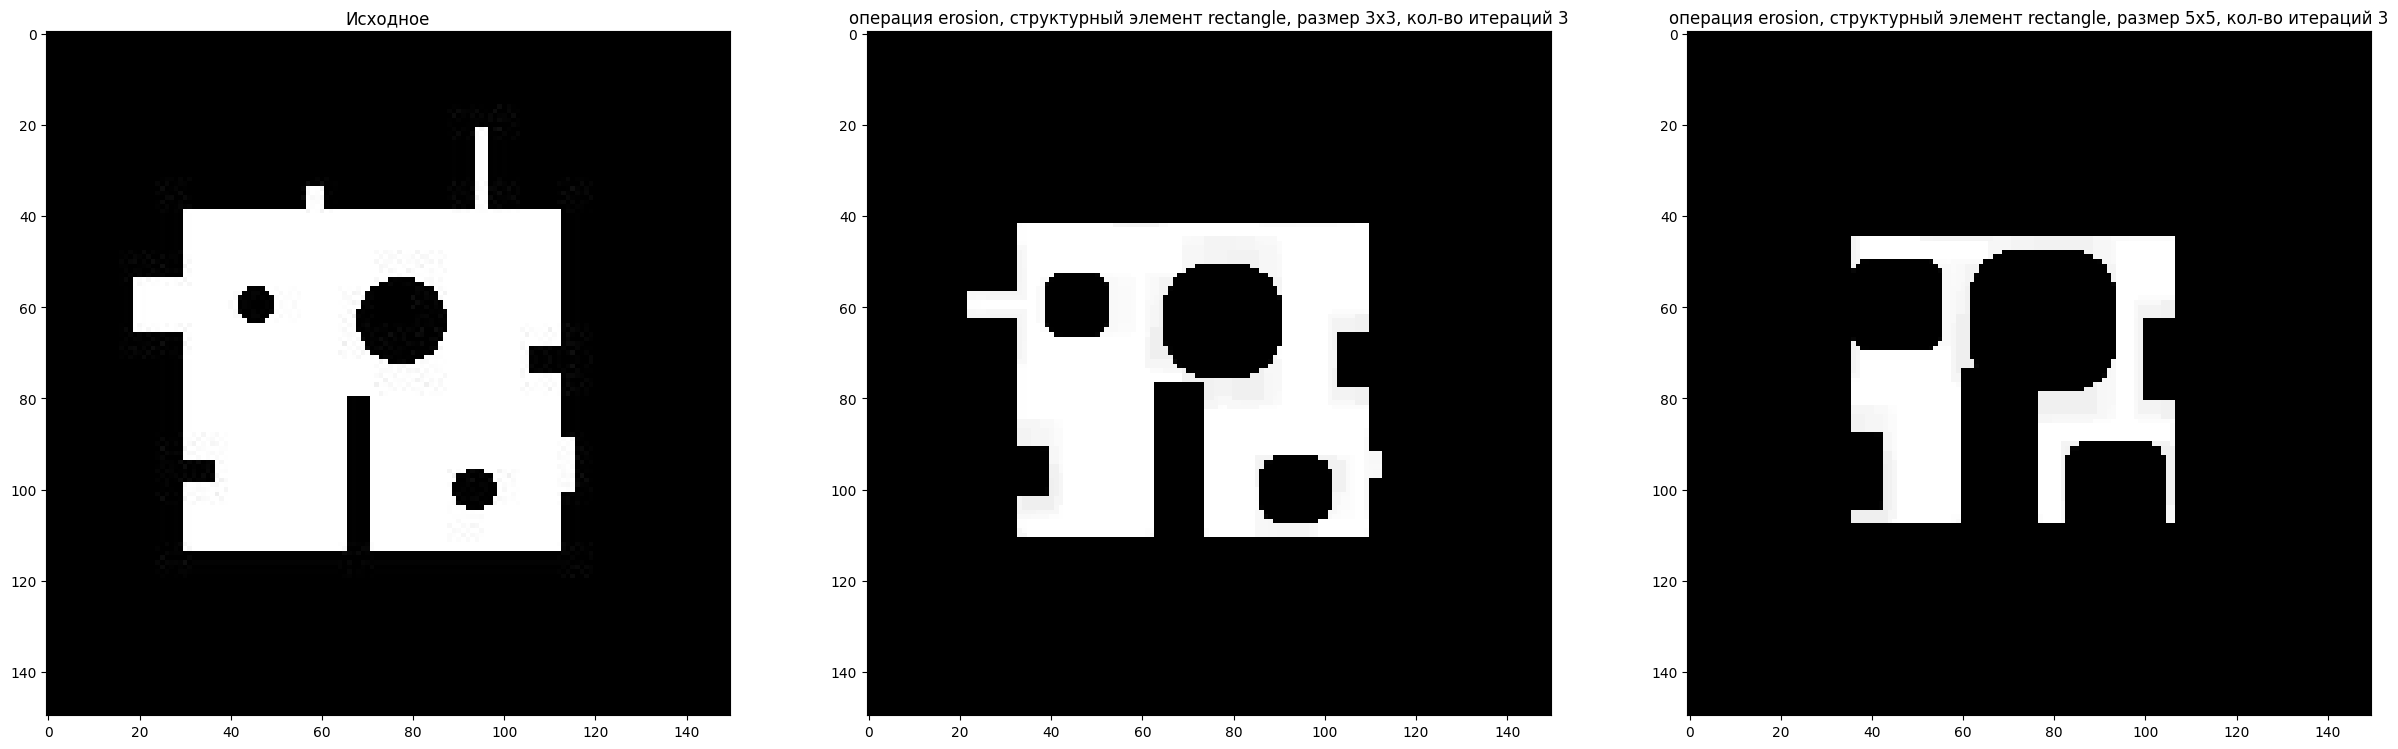

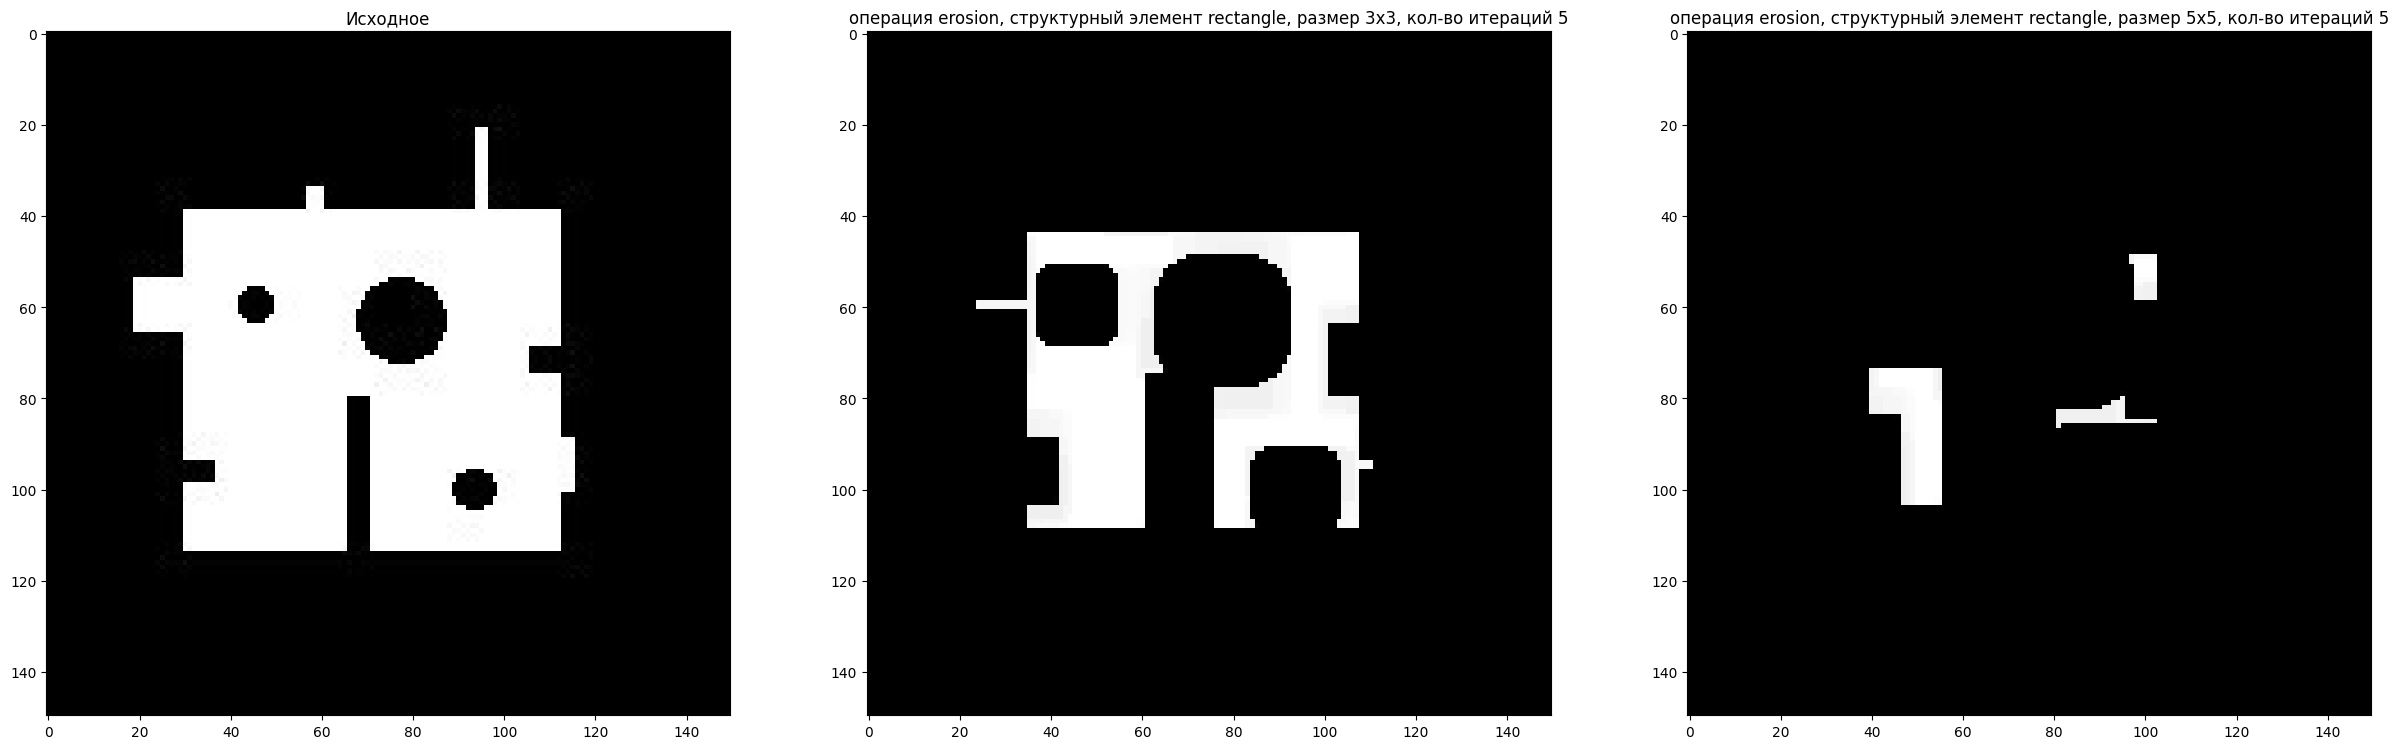

In [13]:
get_operations(img1, type_operations[1], type_kernel[2])

2. Попробуйте сравнить результаты операций открытия и закрытия с
результатами последовательного применения


Операция открытия состоит из двух последовательных шагов: сначала эрозия, а затем дилатация.  Открытие помогает разделить объекты, если они слишком близко расположены друг к другу.

Операция закрытия также состоит из двух последовательных шагов: сначала дилатация, а затем эрозия.  В результате закрытия выполняется заполнение маленьких пробелов и удаление маленьких отверстий в объектах.

In [14]:
def open_MORPH (size_kernel,img):
    kernel = np.ones((size_kernel,size_kernel), np.uint8) 
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

In [15]:
def close_MORPH (size_kernel,img):
    kernel = np.ones((size_kernel,size_kernel), np.uint8) 
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

In [16]:
def open_close_MORPH (size_kernel,img ):
    
    fig, axs = plt.subplots(1, 3, figsize=(30, 10))
    
    img_show( img,'исходное',axs[0])
    img_show( open_MORPH(size_kernel, img),f'opening, size kernel: {size_kernel}',axs[1])
    img_show( close_MORPH(size_kernel, img),f'closing, size kernel: {size_kernel}',axs[2])

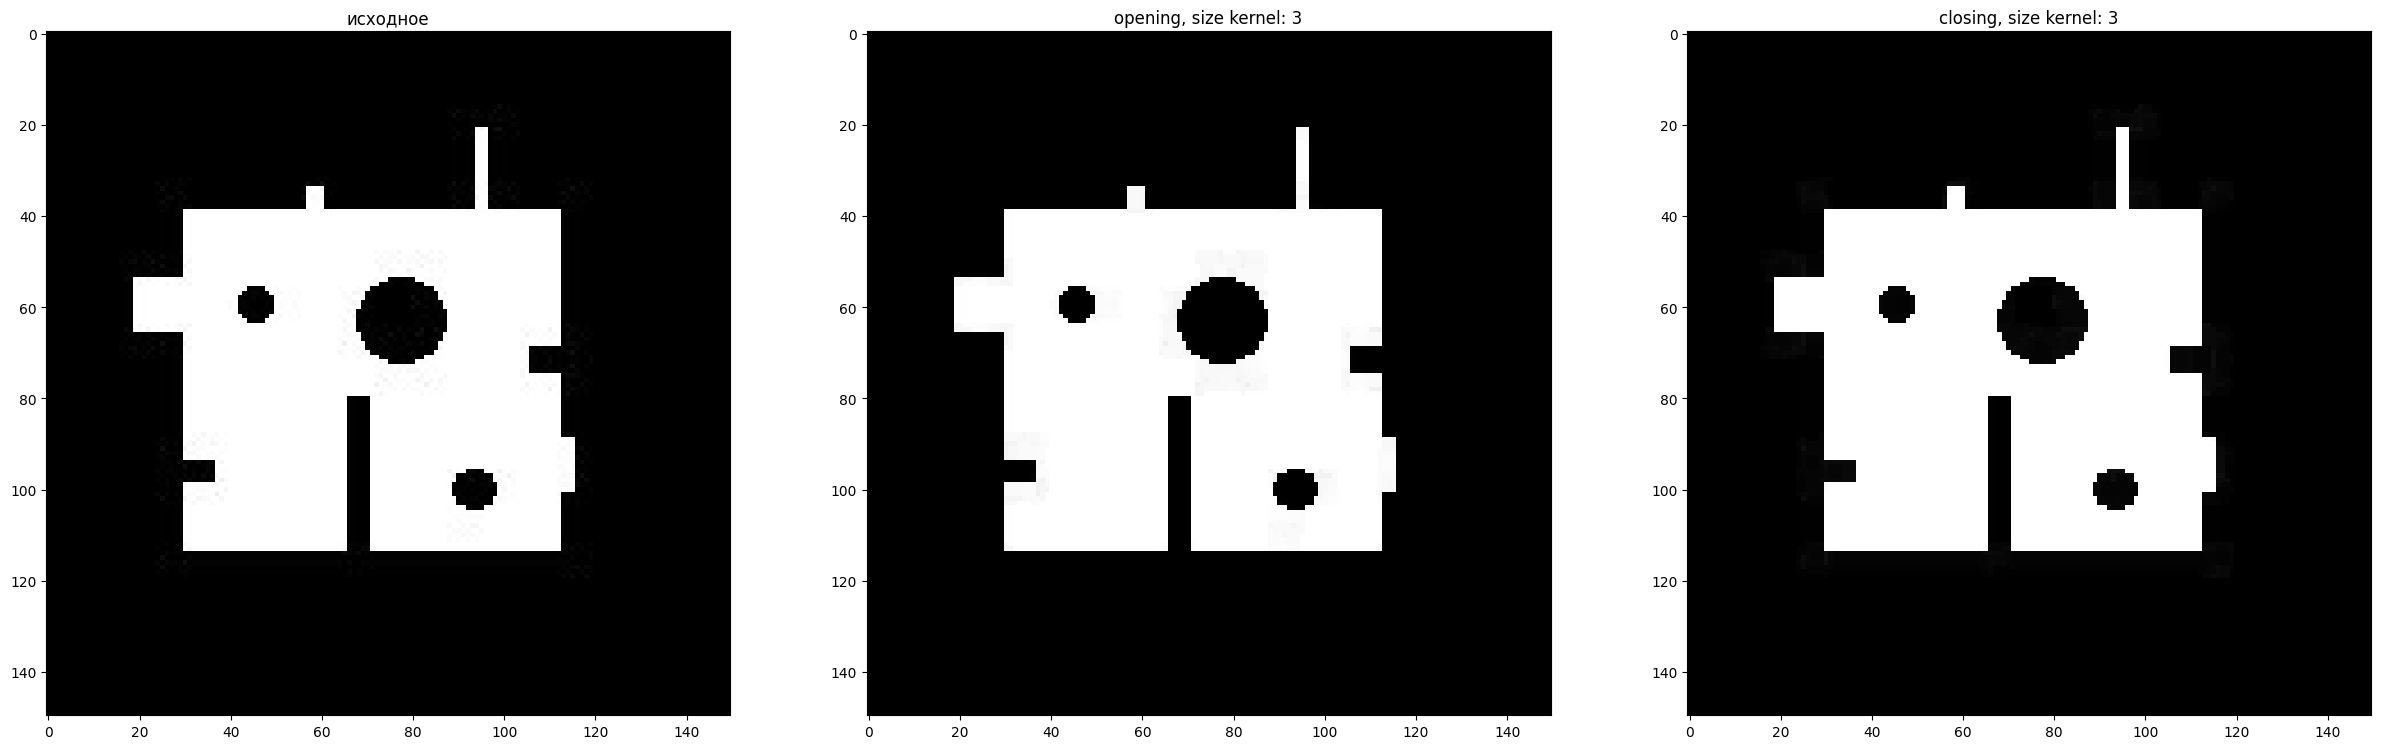

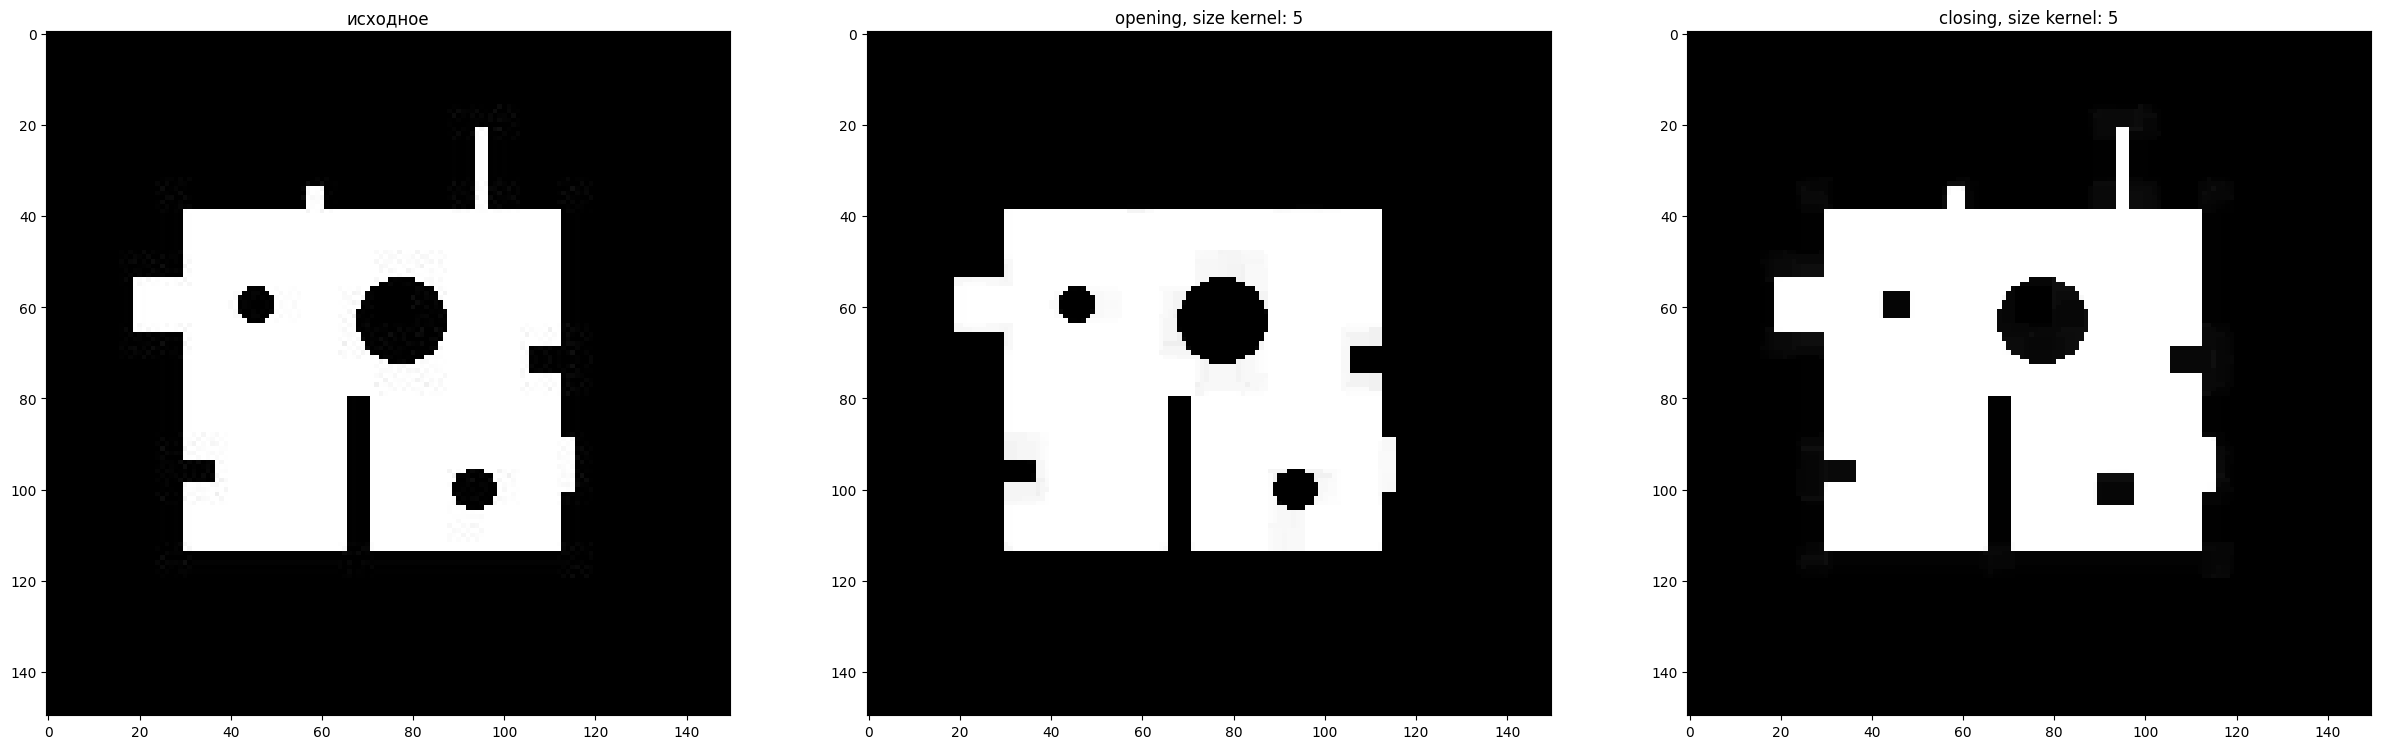

In [17]:
open_close_MORPH(3, img1)
open_close_MORPH(5, img1)

3. Попробуйте сравнить результаты операции закрытия с результатами
последовательного применения дилатации и эрозии:
close(A,B) =er(dil(A,B),B)

In [18]:
def dilated_eroded(size_kernel, img):
    kernel = np.ones((size_kernel,size_kernel), np.uint8) 
    # Последовательное применение дилатации и эрозии
    dilated = cv2.dilate(img, kernel, iterations=1)
    return cv2.erode(dilated, kernel, iterations=1)

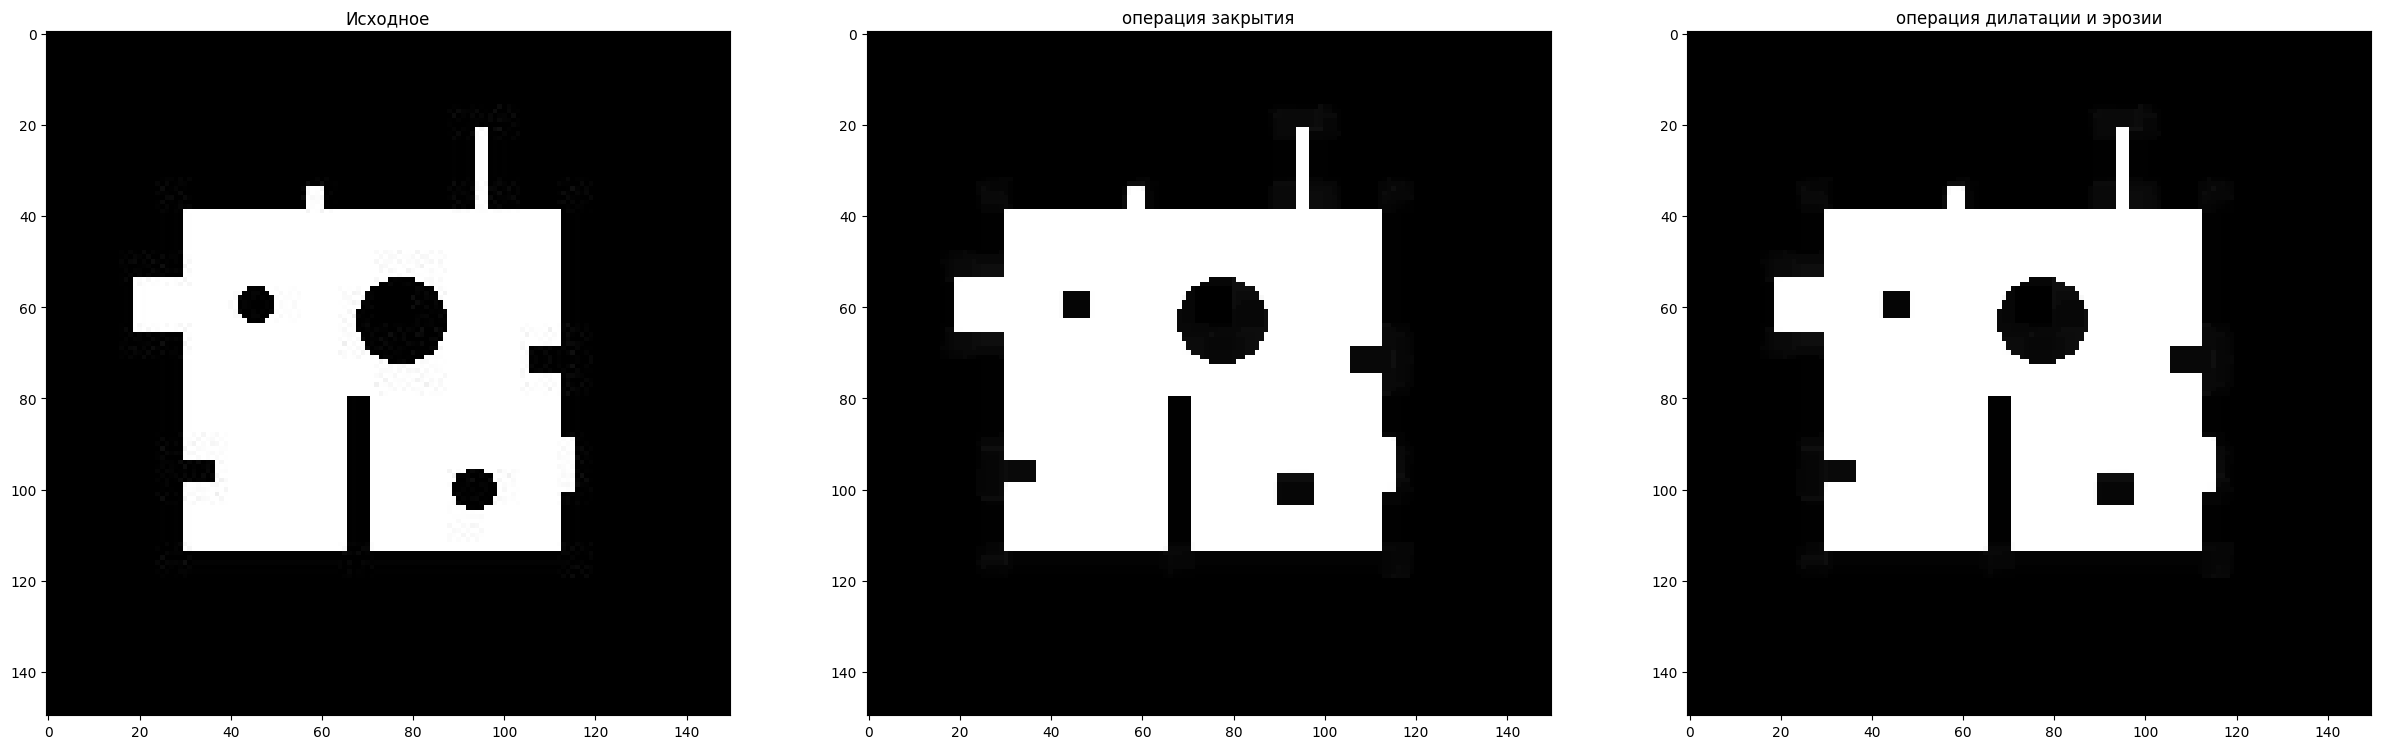

In [19]:
transform_show([img1, 
                close_MORPH(5,img1),
                dilated_eroded(5,img1)],
                ['операция закрытия', 'операция дилатации и эрозии'])

4. Попробуйте сравнить результаты операции открытия с результатами
последовательного применения эрозии и дилатации:
open(A,B) =dil(er(A,B),B)

In [20]:
def eroded_dilated(size_kernel, img):
    
    kernel = np.ones((size_kernel,size_kernel), np.uint8) 

    # Последовательное применение эрозии и дилатации 
    eroded = cv2.erode(img, kernel, iterations=1)
    return cv2.dilate(eroded, kernel, iterations=1)

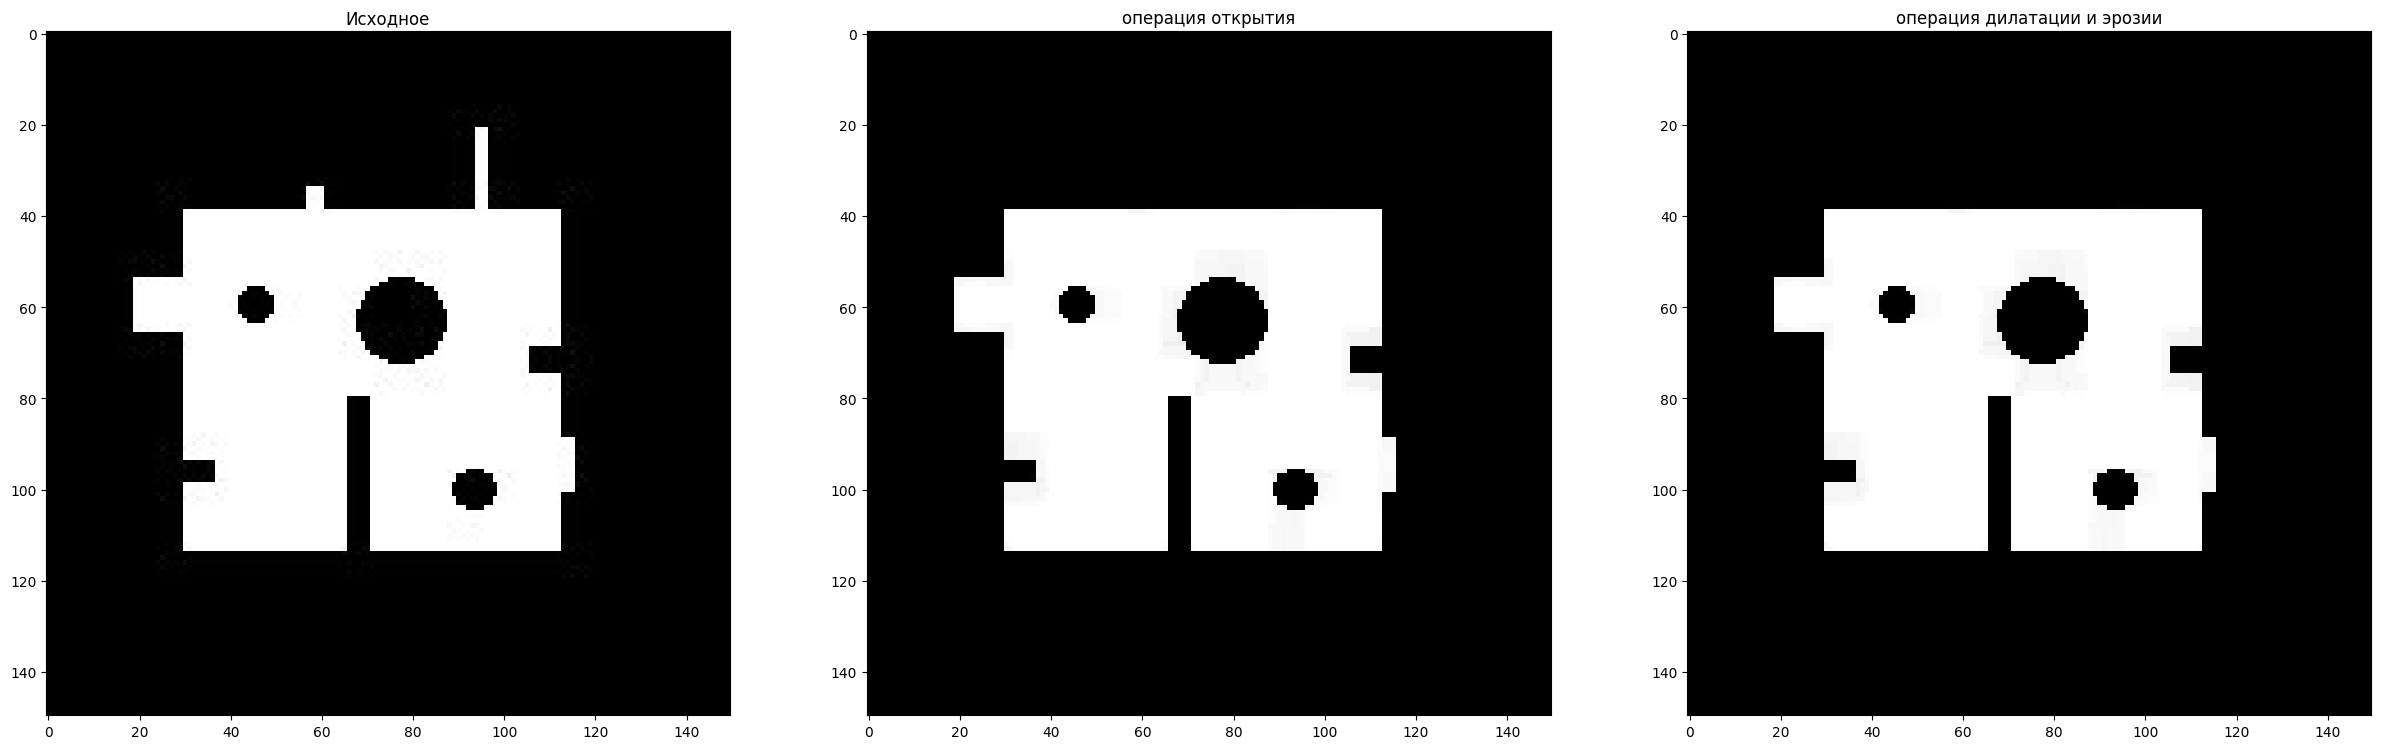

In [21]:
transform_show([img1, 
                open_MORPH(5,img1),
                eroded_dilated(5,img1)],
                ['операция открытия', 'операция дилатации и эрозии'])

5. Для всех изображений найдите границы, используя определение:
boundary(A,B) 

In [22]:
def boundary_img(size_kernel, img):

    kernel = np.ones((size_kernel,size_kernel), np.uint8) 

    # Применение операции эрозии к изображению
    eroded = cv2.erode(img, kernel, iterations=1)

    # Нахождение границ
    boundary = img - eroded

    fig, axs = plt.subplots(1, 2, figsize=(30, 10))

    img_show( img,'исходное',axs[0])
    img_show( boundary,f'boundary ',axs[1])

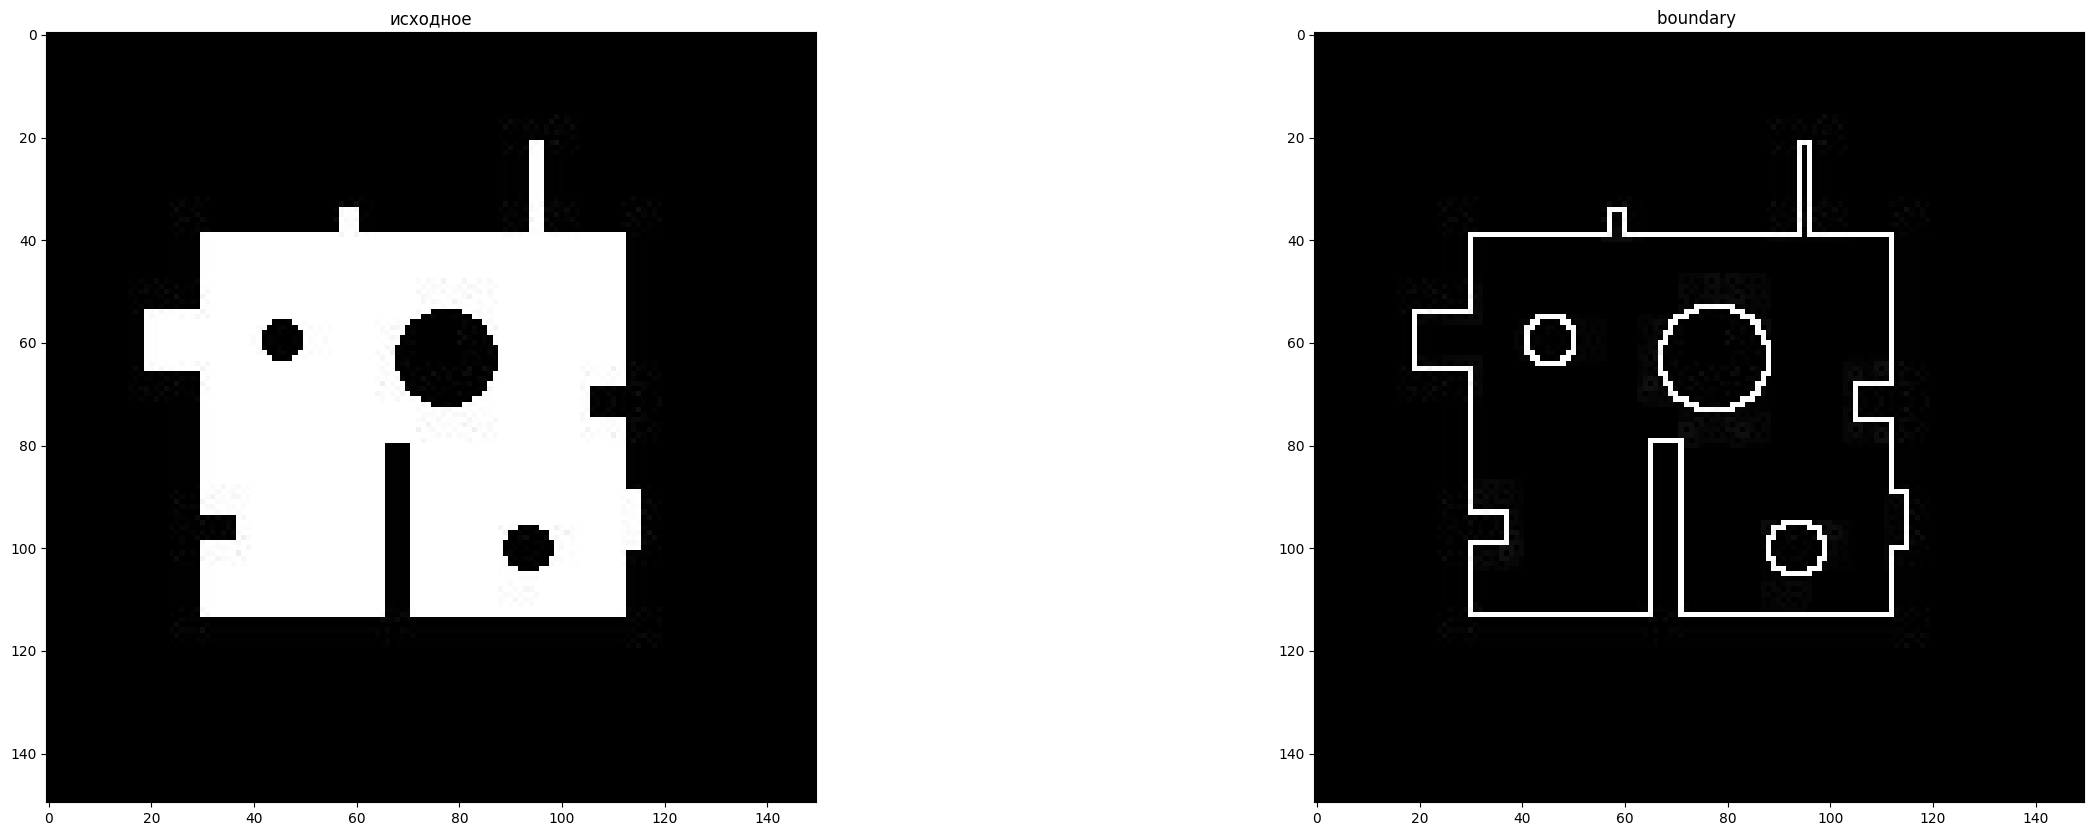

In [23]:
boundary_img(3,img1)

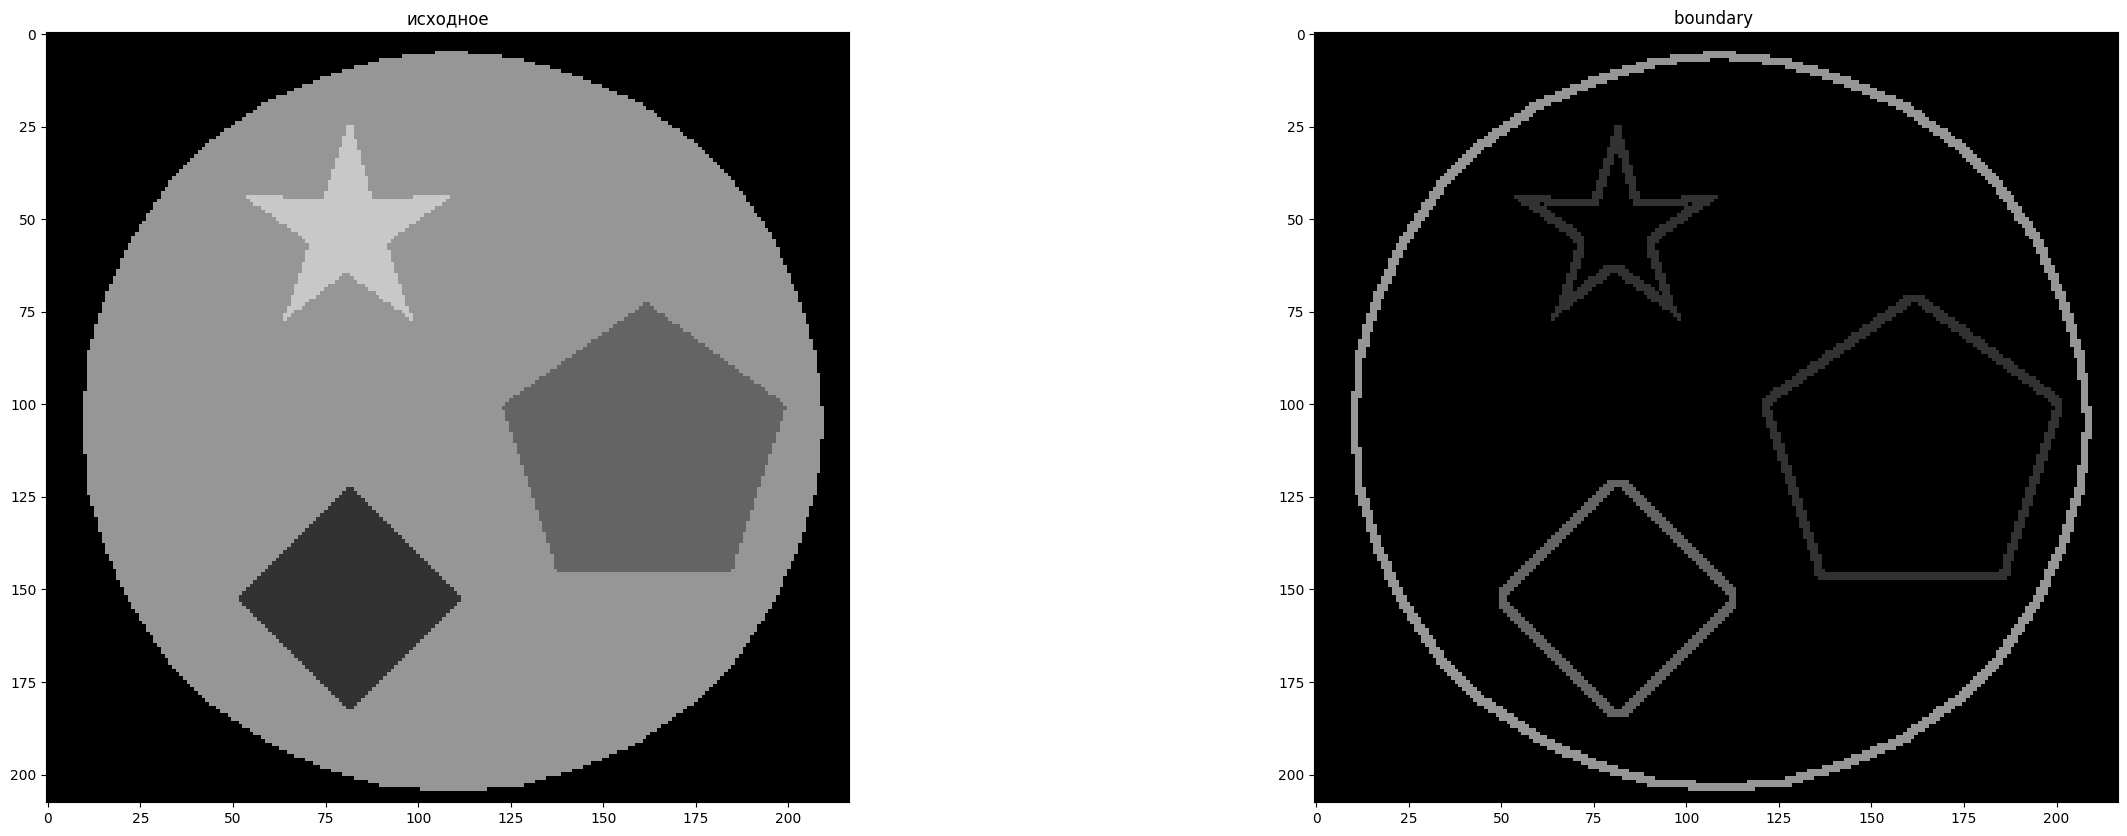

In [24]:
boundary_img(5,img2)

6. Подберите структурный элемент, который бы наилучшим образом
сглаживал углы на изображениях morph.bmp и morph2.bmp. Какую из
операций Вы использовали при этом и почем

In [25]:
def set_type(type, size):
    if type == 'cross':  #структурный элемент ‘крест’
        return cv2.getStructuringElement(cv2.MORPH_CROSS, (size,size)) # структурный элемент ‘крест’ размера size
    elif type == 'ellipse':
        return  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size,size)) #структурный элемент ‘эллипс’ размера size
    elif type == 'rectangle':
        return cv2.getStructuringElement(cv2.MORPH_RECT, (size,size)) # структурный элемент ‘прямоугольник’ размера size

In [26]:
def smoothing(image):
    sizes = [3, 5, 7] 
    type_structur = ['cross','ellipse','rectangle']
    for size in sizes:  
        for structur in type_structur:  
            erode_img = cv2.morphologyEx(image, cv2.MORPH_ERODE, set_type(structur,size), iterations=1) # Эрозия
            result_img = cv2.morphologyEx(erode_img, cv2.MORPH_DILATE, set_type(structur,size), iterations=2) # Дилатация


            fig, axs = plt.subplots(1, 2, figsize=(30, 10))
            img_show( image,'исходное',axs[0])
            img_show( result_img,f'Сглаживание углов kernel:{size} , type:{structur}',axs[1])



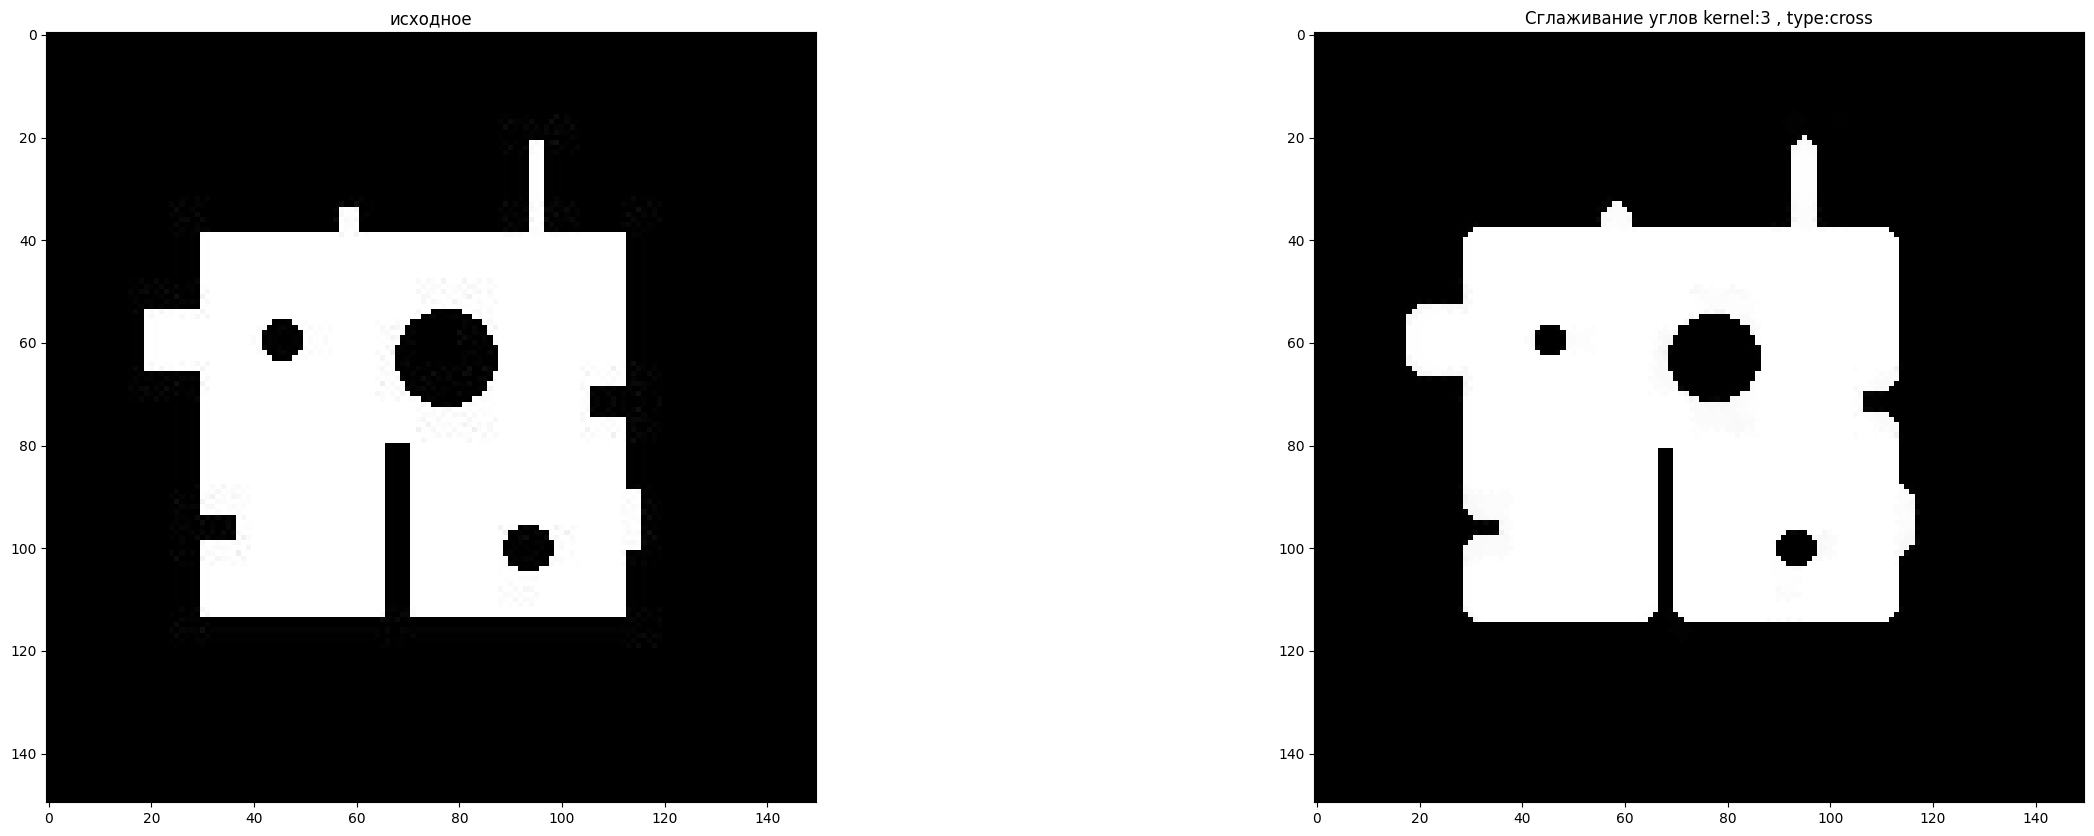

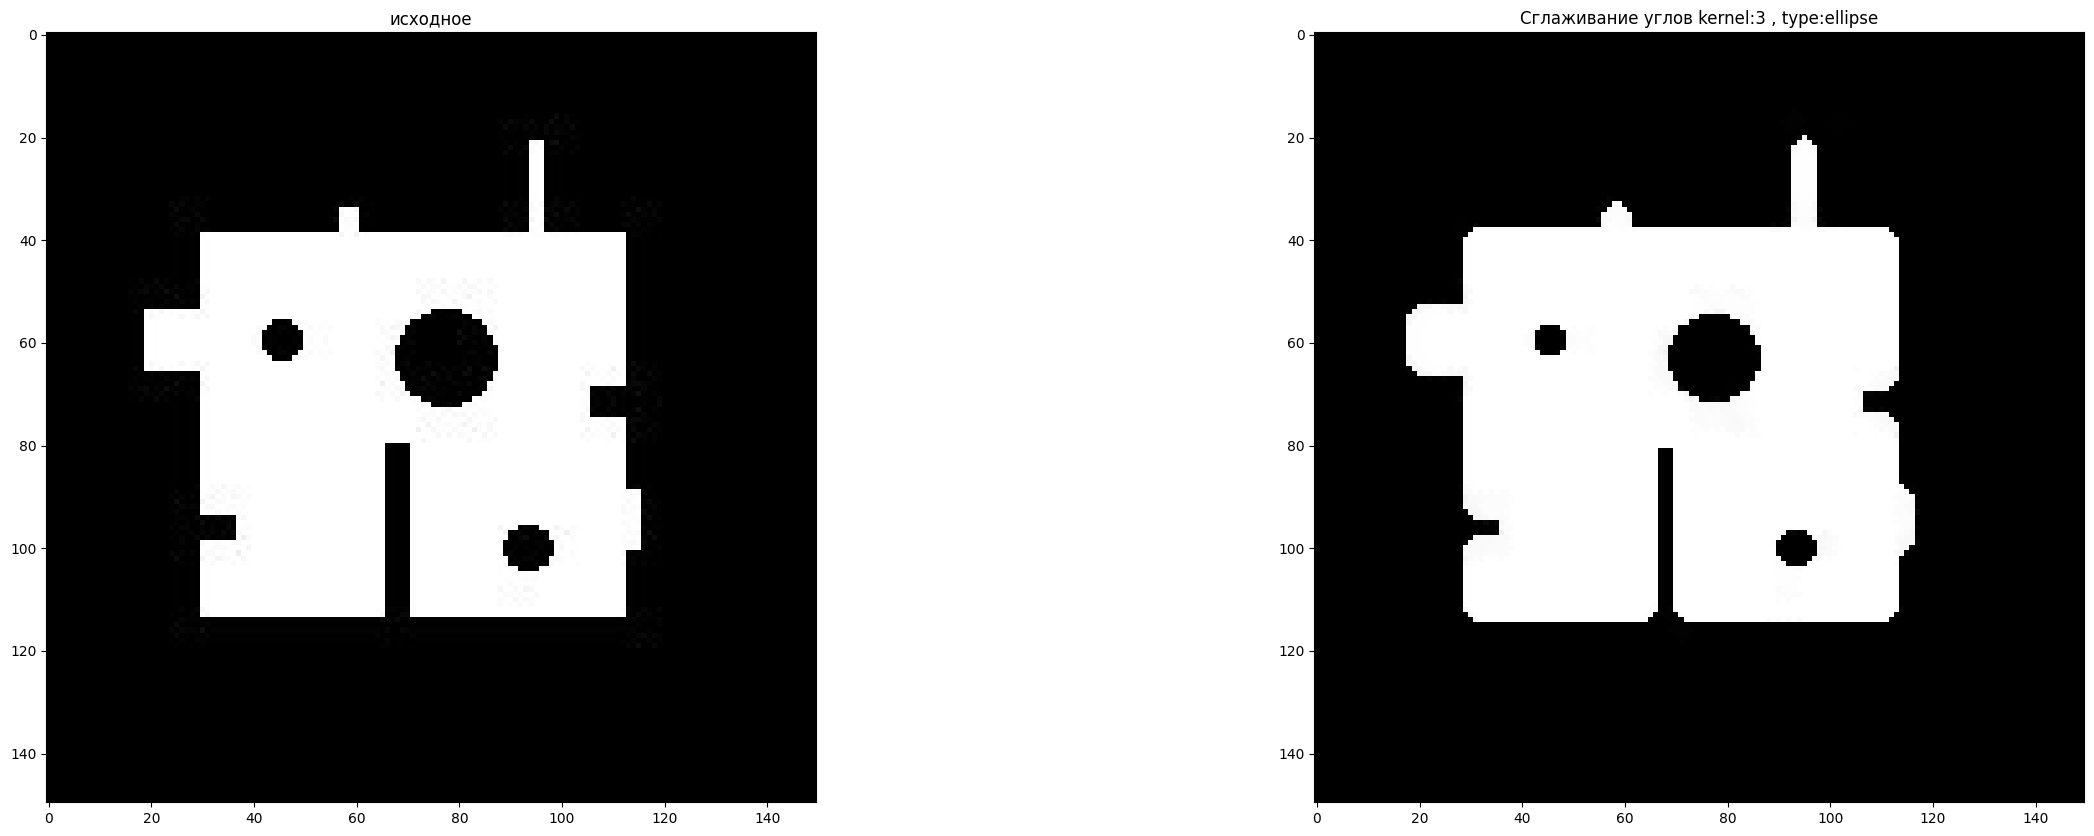

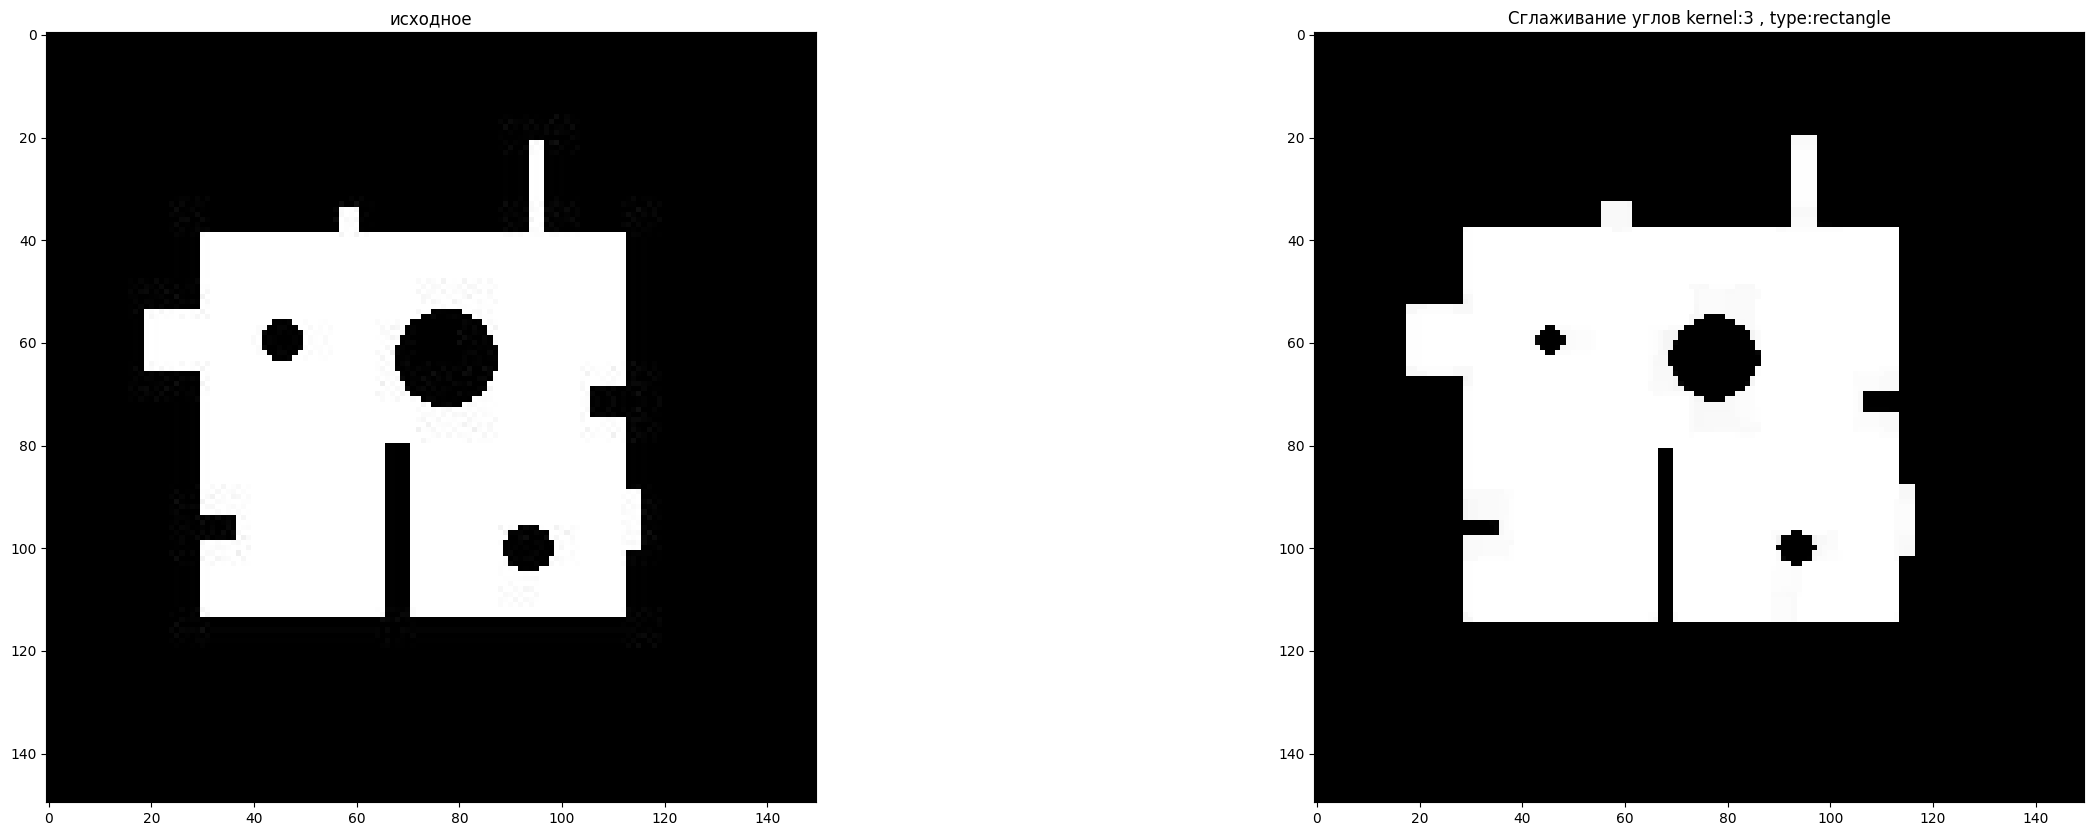

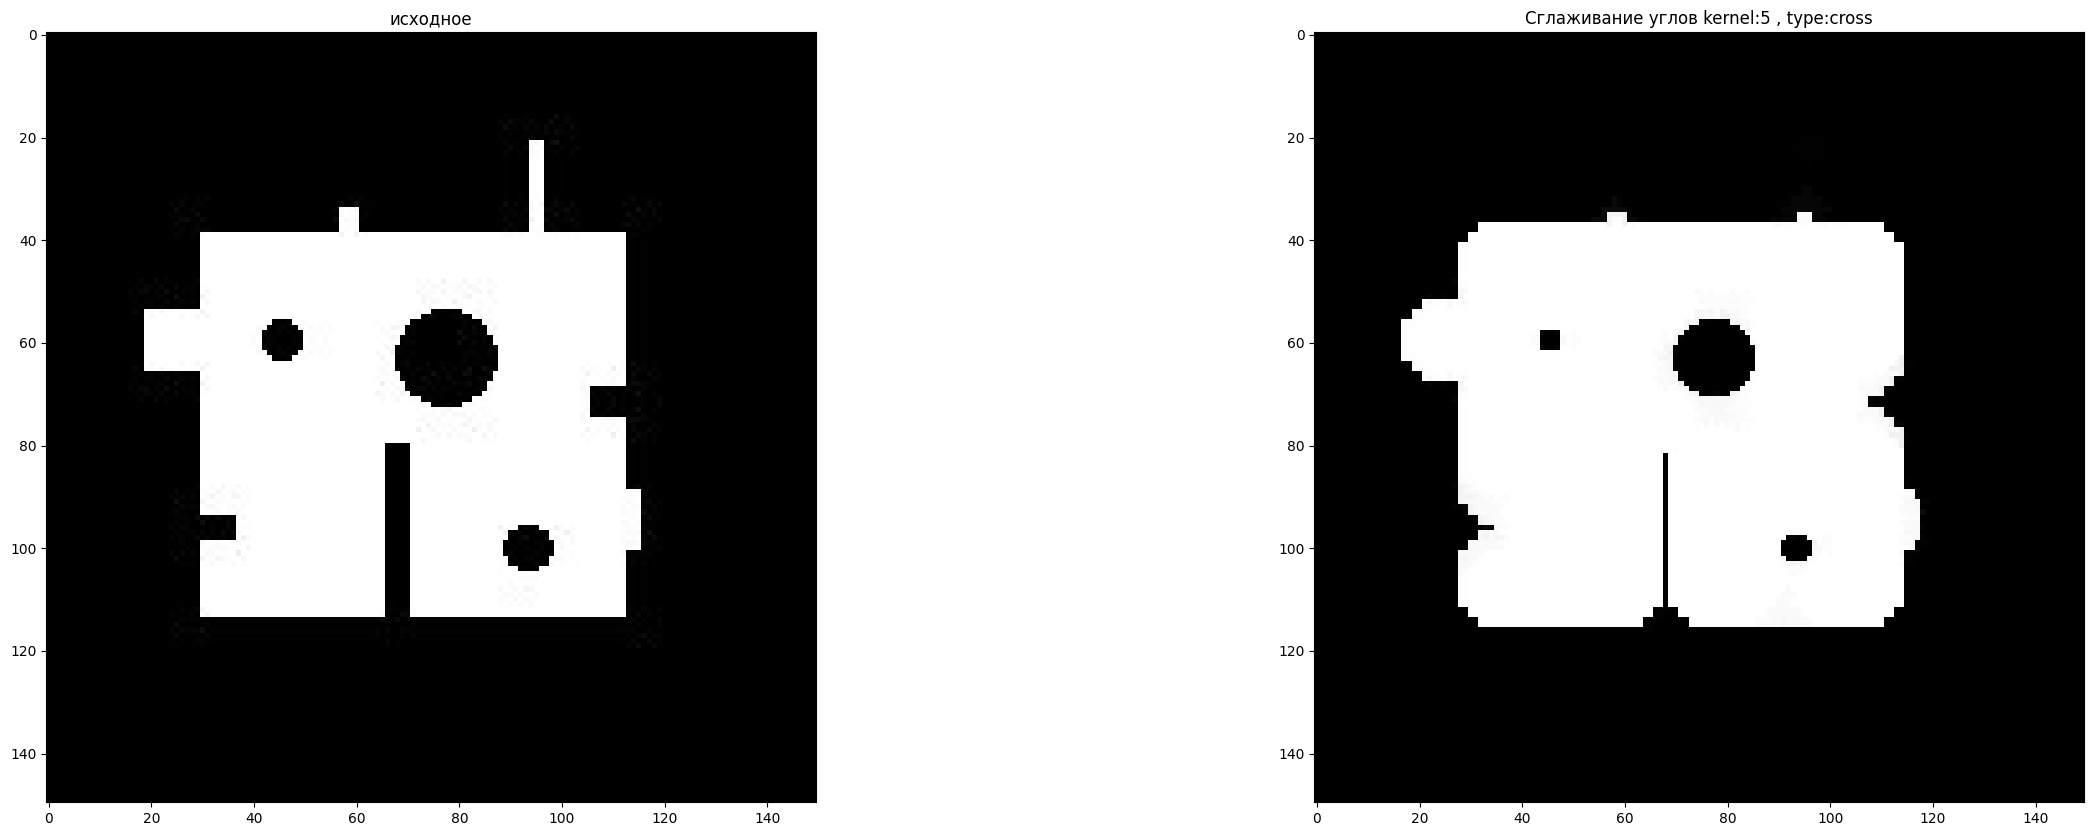

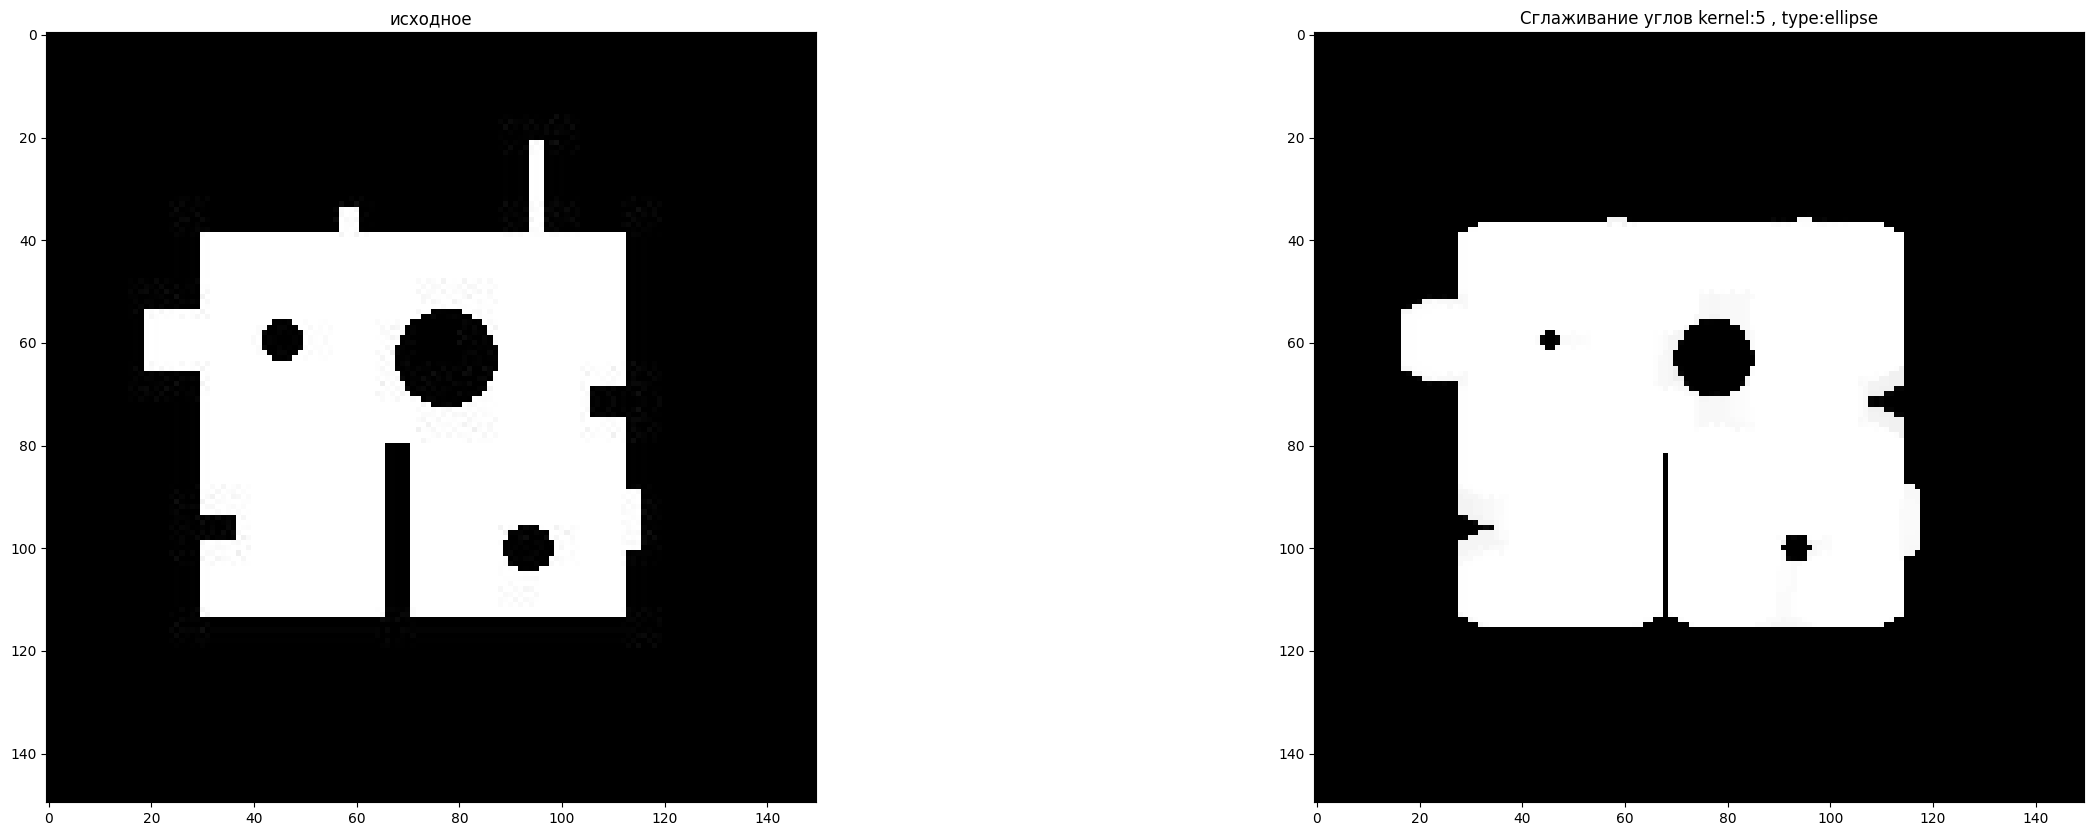

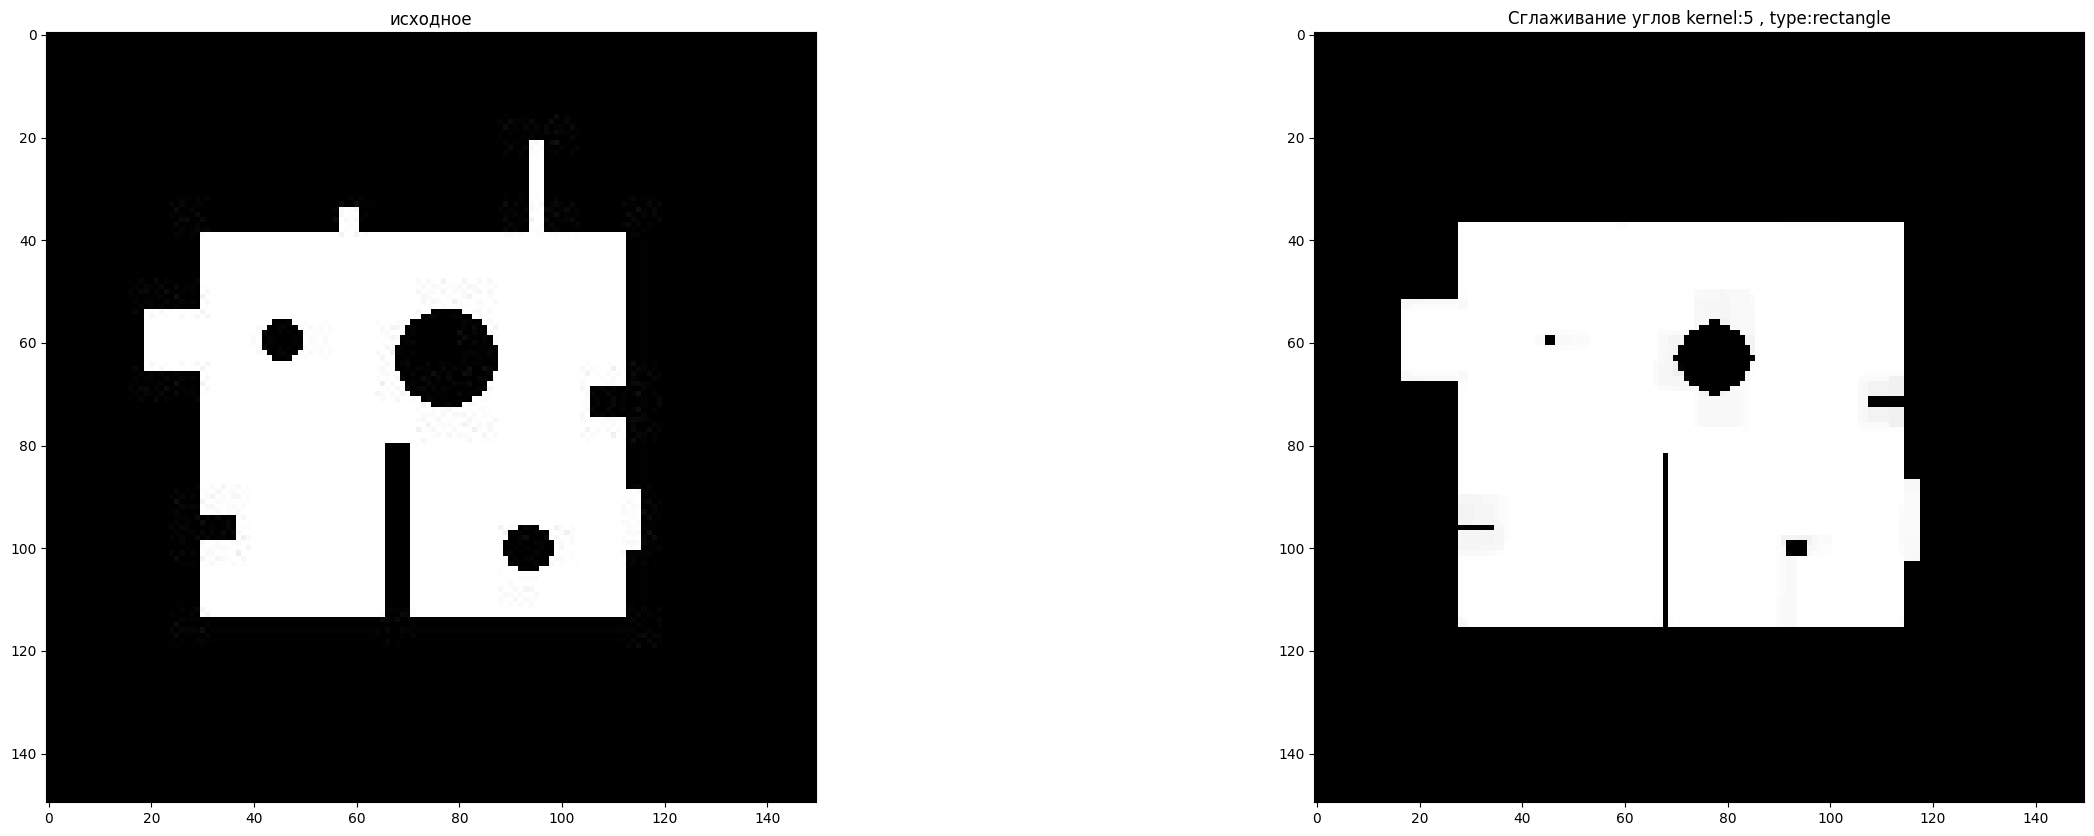

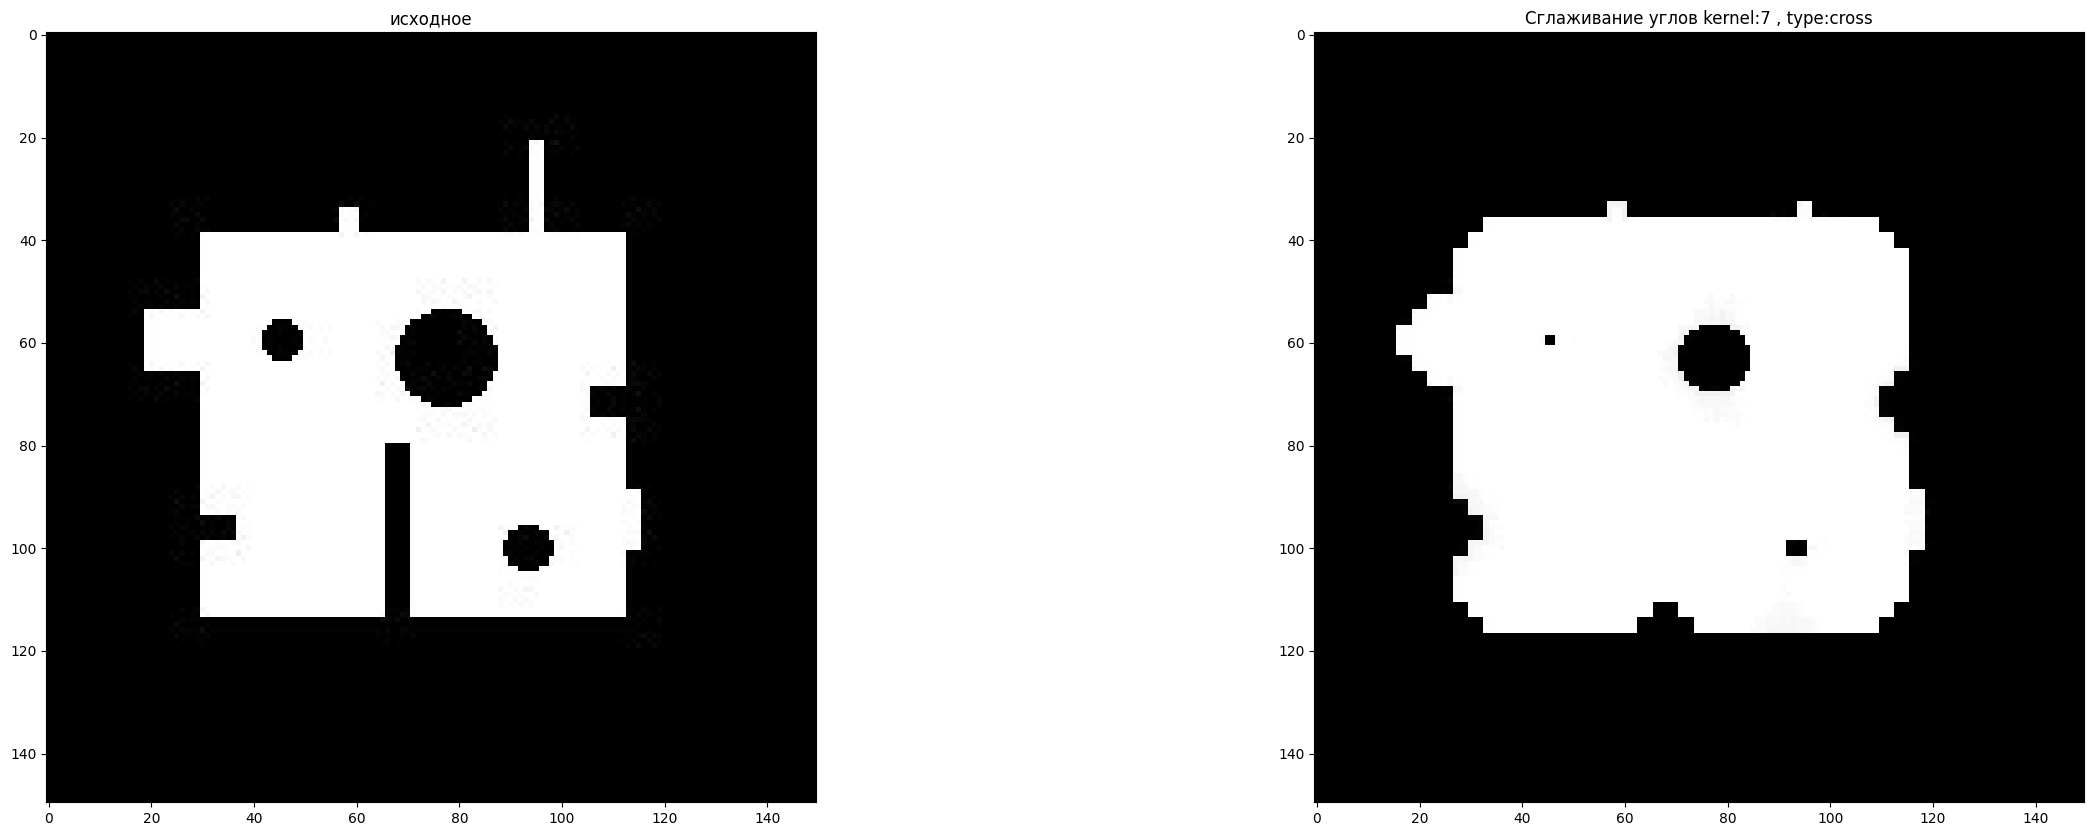

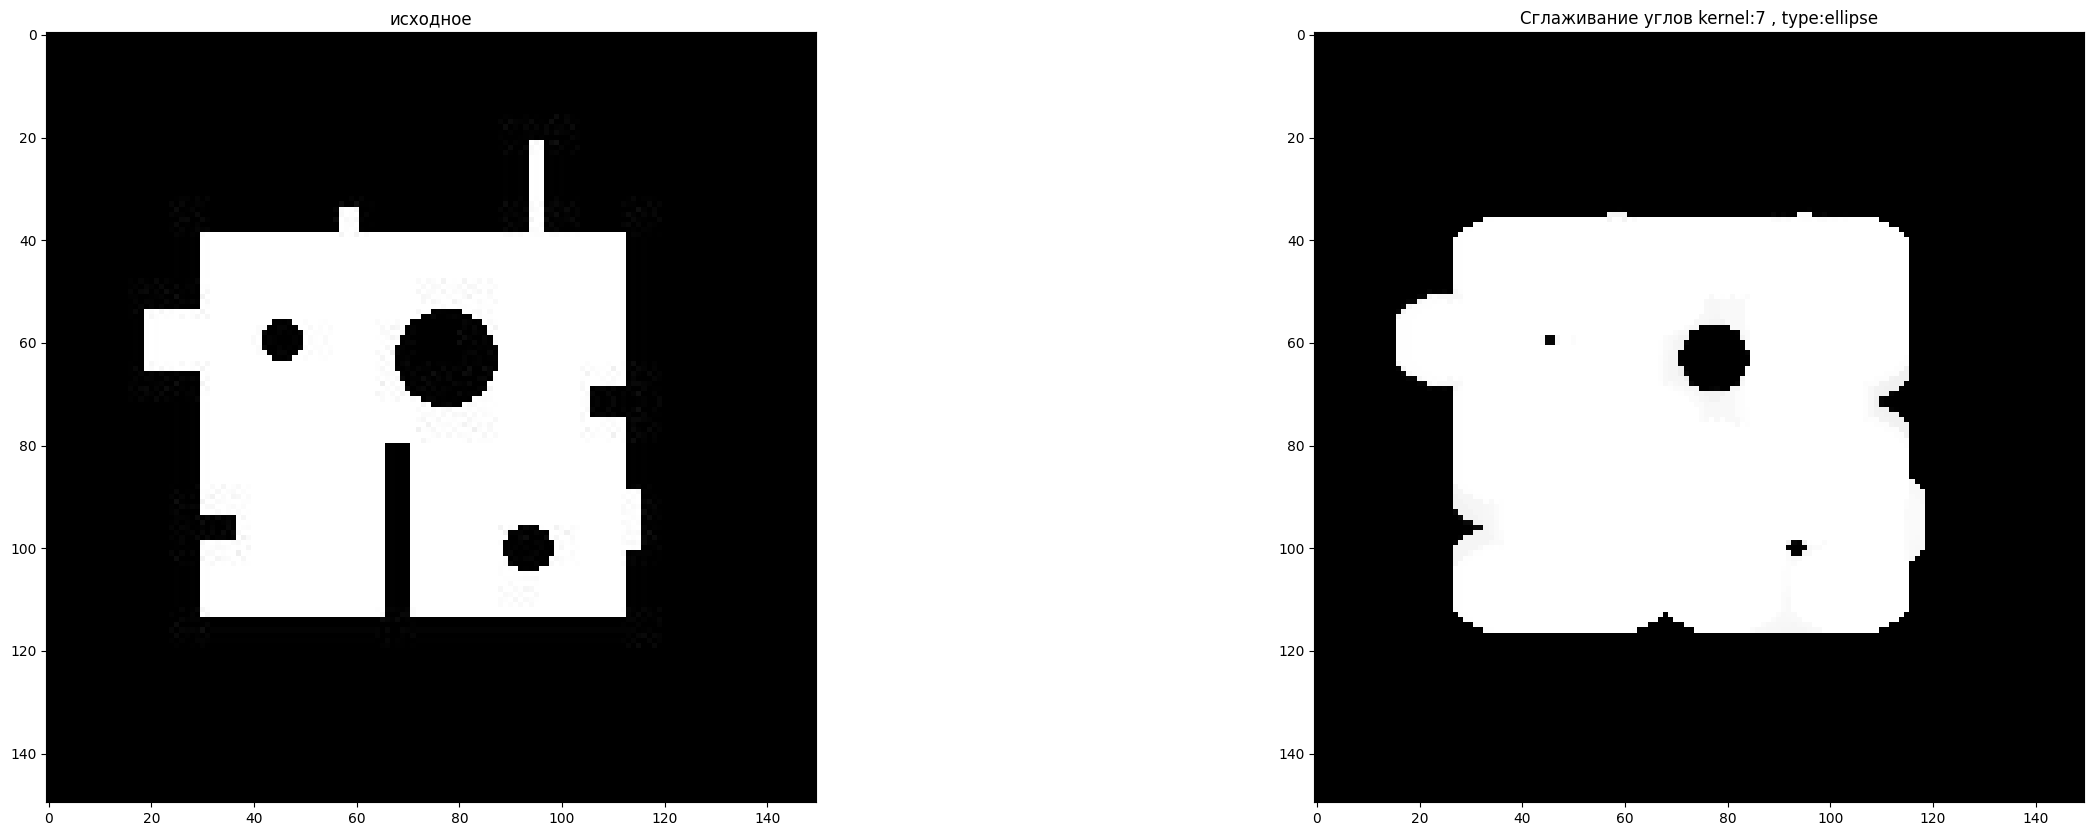

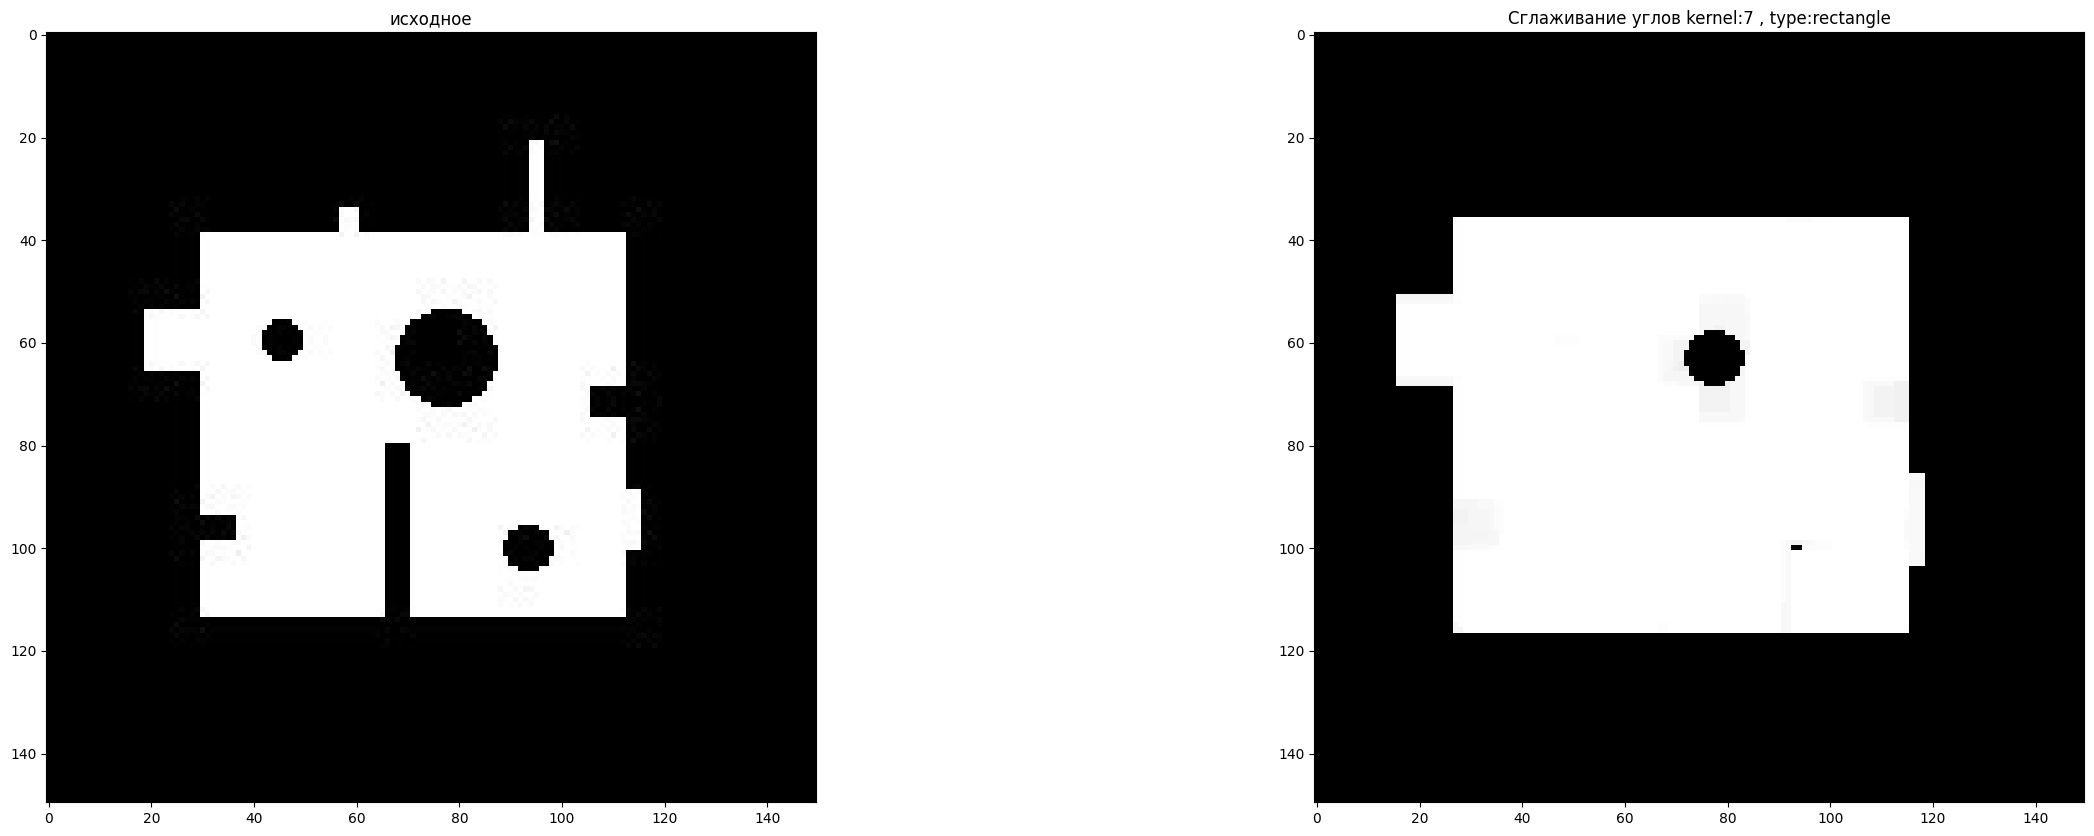

In [27]:
smoothing(img1)

7. С помощью порога бинаризуйте изображение morph3.bmp. Найдите
контуры каждого элемента по отдельности, (используйте для этого разное
значение порога). Выделите несколько объектов на изображении, найдите их
контуры. Опишите и сохраните результаты. Какие фильтры Вы выбирали?

In [28]:
def draw_countr(contours,gray):
    image_contours_individual = np.zeros_like(gray)
    fig, axs = plt.subplots((len(contours) + 2) // 3, 3, figsize=(15, 5))
    for i, contour in enumerate(contours):# Проходим по списку контуров
        cv2.drawContours(image_contours_individual, [contour], -1, (255, 255, 255), 2)# Отрисовка текущего контура

        # Определяем позицию для отображения текущего контура
        row = i // 3
        col = i % 3
    
        axs[row, col].imshow(image_contours_individual, cmap='gray')# Отображение изображения с текущим контуром
        image_contours_individual = np.zeros_like(gray)# Сброс изображения для следующего контура
    plt.show()

Применение адаптивного порога в обработке изображений имеет цель разделить изображение на объекты и фоны, путем создания бинарного изображения, где каждый пиксель либо считается объектом, либо фоном, в зависимости от того, превышает ли его интенсивность пороговое значение.

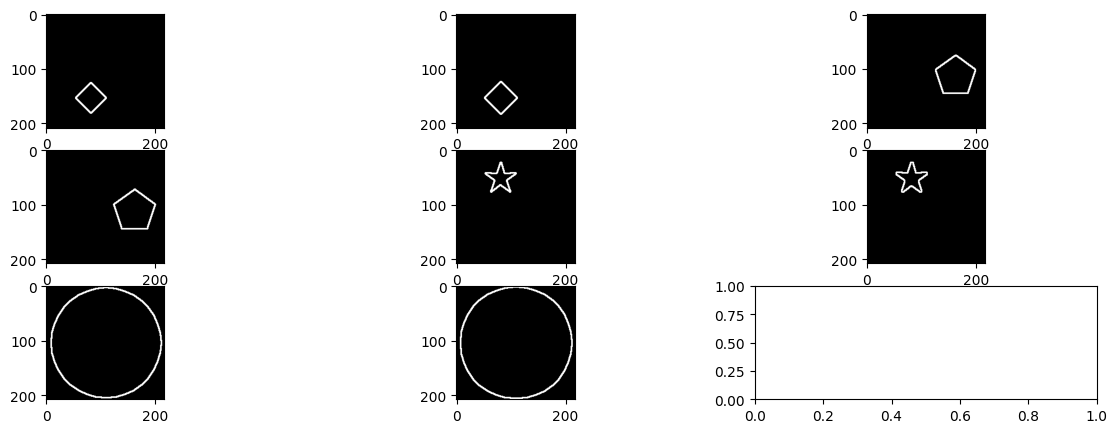

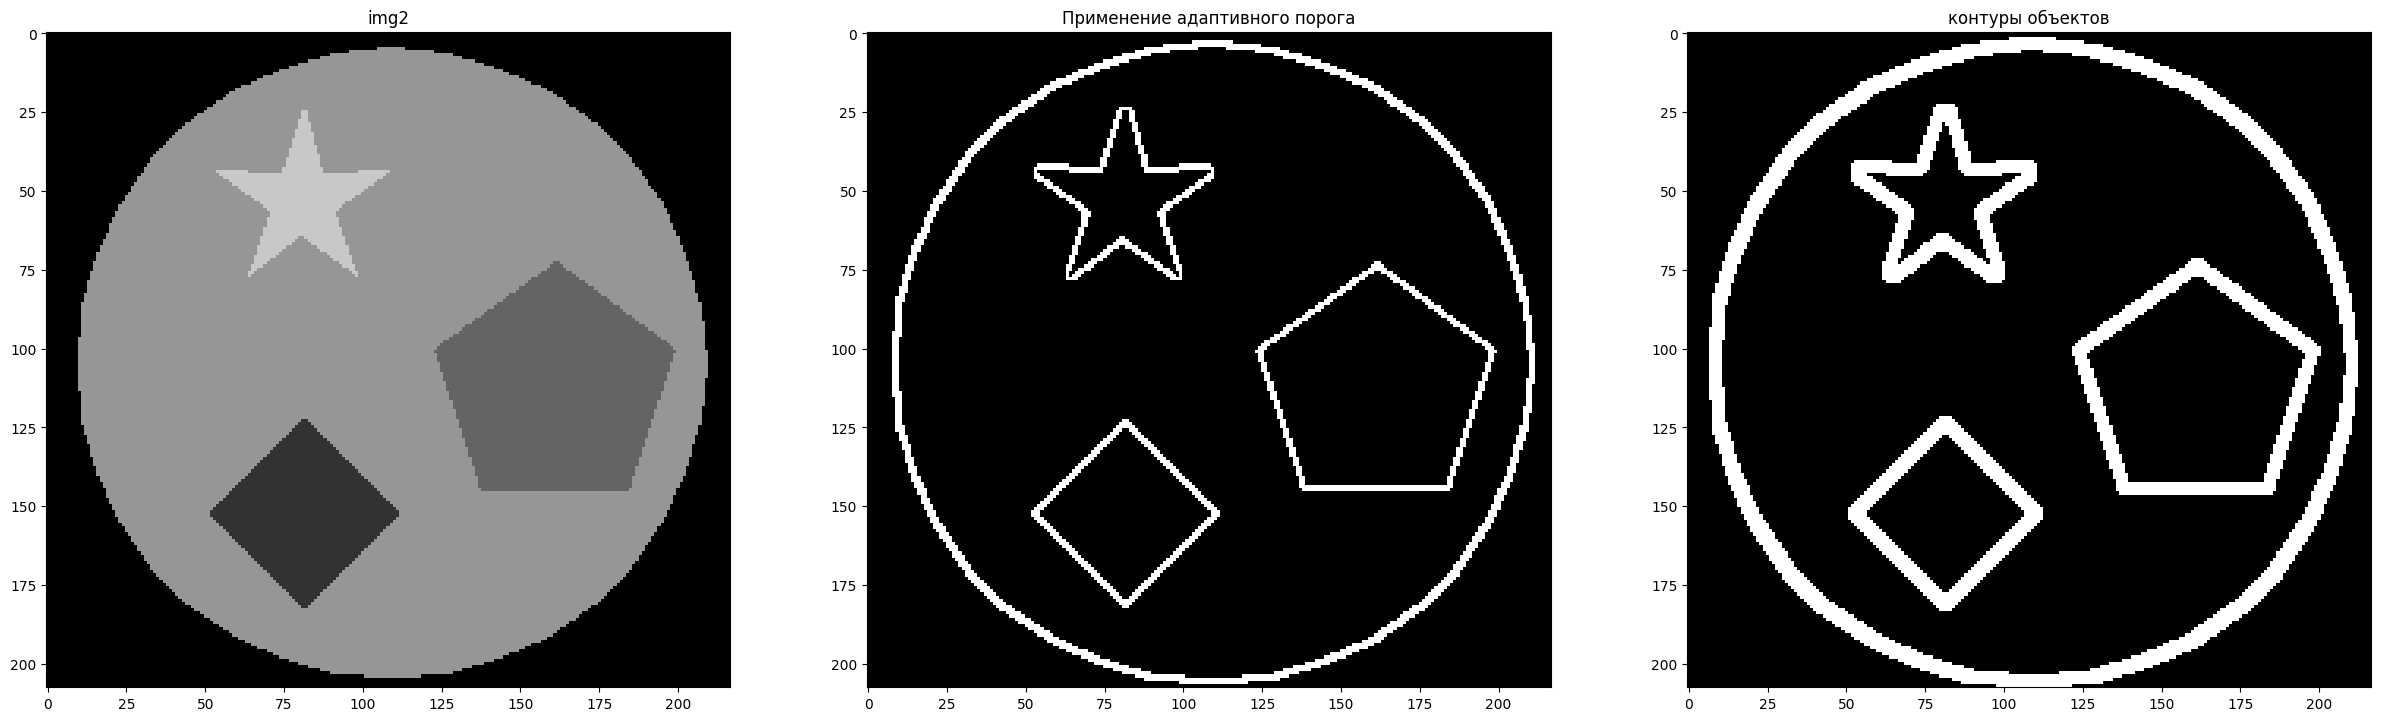

In [29]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)# Конвертация в оттенки серого
binary_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 5)# Применение адаптивного порога
contours, _ = cv2.findContours(binary_adaptive, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)# Нахождение контуров объектов

# Отрисовка контуров на изображении
image_contours = np.zeros_like(gray)
cv2.drawContours(image_contours, contours, -1, (255, 255, 255), 2)

draw_countr(contours,gray)

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
img_show( img2,'img2',axs[0])
img_show( binary_adaptive,'Применение адаптивного порога',axs[1])
img_show( image_contours,f'контуры объектов',axs[2])

8. Откройте изображение Fingerprint.jpg. Разработайте и реализуйте
последовательность морфологических операций для качественного
выделения отпечатка пальца из изображения.

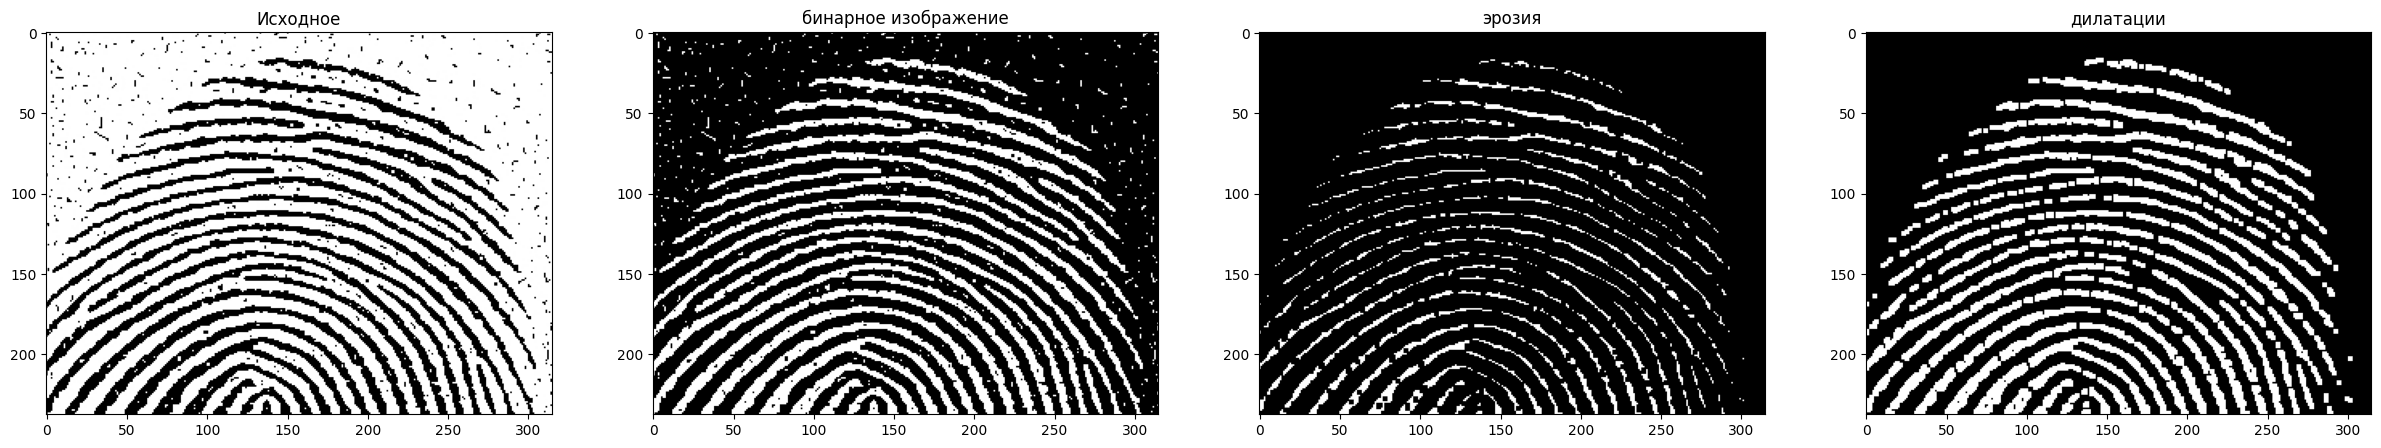

In [30]:

# Применение пороговой обработки для создания бинарного изображения
_, binary_img = cv2.threshold(img4, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((3,3),np.uint8)

# Морфологическое преобразование: эрозия
erosion = cv2.erode(binary_img, kernel, iterations = 1)

# Морфологическое преобразование: дилатации
dilation = cv2.dilate(erosion, kernel, iterations = 1)

fig, axs = plt.subplots(1, 4, figsize=(30, 10))
img_show( img4,'Исходное',axs[0])
img_show( binary_img,'бинарное изображение',axs[1])
img_show( erosion,f'эрозия',axs[2])
img_show( dilation,f'дилатации',axs[3])
